# **Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparation**

In [3]:
data_path = '/content/drive/MyDrive/STA 301 Project/Dataset/Cleaned_dataset.csv'

In [4]:
df = pd.read_csv(data_path)
df.head()

Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955

In [5]:
df.isna().any()

Date_of_journey      False
Journey_day          False
Airline              False
Flight_code          False
Class                False
Source               False
Departure            False
Total_stops          False
Arrival              False
Destination          False
Duration_in_hours    False
Days_left            False
Fare                 False
dtype: bool

In [6]:
df.describe()

Duration_in_hours      Days_left           Fare
count      452088.000000  452088.000000  452088.000000
mean           12.349222      25.627902   22840.100890
std             7.431478      14.300846   20307.963002
min             0.750000       1.000000    1307.000000
25%             6.583300      13.000000    8762.750000
50%            11.333300      26.000000   13407.000000
75%            16.500000      38.000000   35587.000000
max            43.583300      50.000000  143019.000000

In [7]:
df = df.drop(columns=['Flight_code'])

In [8]:
# Splitting Date_of_journey to 6 periods of two weeks

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
bins = pd.to_datetime(['2023-01-16', '2023-02-01', '2023-02-16', '2023-03-01', '2023-03-16'])
labels = ['Jan_16-31', 'Feb_1-15', 'Feb_16-29', 'Mar_1-15']
df['period'] = pd.cut(df['Date_of_journey'], bins=bins, labels=labels, right=False)
df.head()

Date_of_journey Journey_day    Airline    Class Source   Departure  \
0      2023-01-16      Monday   SpiceJet  Economy  Delhi  After 6 PM   
1      2023-01-16      Monday     Indigo  Economy  Delhi  After 6 PM   
2      2023-01-16      Monday   GO FIRST  Economy  Delhi  After 6 PM   
3      2023-01-16      Monday   SpiceJet  Economy  Delhi  After 6 PM   
4      2023-01-16      Monday  Air India  Economy  Delhi  After 6 PM   

  Total_stops      Arrival Destination  Duration_in_hours  Days_left  Fare  \
0    non-stop   After 6 PM      Mumbai             2.0833          1  5335   
1    non-stop  Before 6 AM      Mumbai             2.3333          1  5899   
2    non-stop  Before 6 AM      Mumbai             2.1667          1  5801   
3    non-stop   After 6 PM      Mumbai             2.0833          1  5794   
4    non-stop   After 6 PM      Mumbai             2.1667          1  5955   

      period  
0  Jan_16-31  
1  Jan_16-31  
2  Jan_16-31  
3  Jan_16-31  
4  Jan_16-31

In [9]:
# Splitting Journey_day to weekday and weekend

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

df['day_type'] = df['Journey_day'].apply(lambda x: 'Weekend' if x in weekends else 'Weekday')
df.head()

Date_of_journey Journey_day    Airline    Class Source   Departure  \
0      2023-01-16      Monday   SpiceJet  Economy  Delhi  After 6 PM   
1      2023-01-16      Monday     Indigo  Economy  Delhi  After 6 PM   
2      2023-01-16      Monday   GO FIRST  Economy  Delhi  After 6 PM   
3      2023-01-16      Monday   SpiceJet  Economy  Delhi  After 6 PM   
4      2023-01-16      Monday  Air India  Economy  Delhi  After 6 PM   

  Total_stops      Arrival Destination  Duration_in_hours  Days_left  Fare  \
0    non-stop   After 6 PM      Mumbai             2.0833          1  5335   
1    non-stop  Before 6 AM      Mumbai             2.3333          1  5899   
2    non-stop  Before 6 AM      Mumbai             2.1667          1  5801   
3    non-stop   After 6 PM      Mumbai             2.0833          1  5794   
4    non-stop   After 6 PM      Mumbai             2.1667          1  5955   

      period day_type  
0  Jan_16-31  Weekday  
1  Jan_16-31  Weekday  
2  Jan_16-31  Weekday  
3  Jan_16-31  Weekday  
4  Jan_16-31  Weekday

In [10]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Class', 'Source',
       'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'period', 'day_type'],
      dtype='object')

In [11]:
analysis_cols = ['period', 'day_type', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare']
df_analysis = df[analysis_cols]
df_analysis.head()

period day_type    Airline    Class Source   Departure Total_stops  \
0  Jan_16-31  Weekday   SpiceJet  Economy  Delhi  After 6 PM    non-stop   
1  Jan_16-31  Weekday     Indigo  Economy  Delhi  After 6 PM    non-stop   
2  Jan_16-31  Weekday   GO FIRST  Economy  Delhi  After 6 PM    non-stop   
3  Jan_16-31  Weekday   SpiceJet  Economy  Delhi  After 6 PM    non-stop   
4  Jan_16-31  Weekday  Air India  Economy  Delhi  After 6 PM    non-stop   

       Arrival Destination  Duration_in_hours  Days_left  Fare  
0   After 6 PM      Mumbai             2.0833          1  5335  
1  Before 6 AM      Mumbai             2.3333          1  5899  
2  Before 6 AM      Mumbai             2.1667          1  5801  
3   After 6 PM      Mumbai             2.0833          1  5794  
4   After 6 PM      Mumbai             2.1667          1  5955

In [12]:
# df_analysis.to_csv('analysis.csv')

In [14]:
df['Airline'].value_counts()

Airline
Vistara        231490
Air India      119841
Indigo          65659
AirAsia         15764
GO FIRST        10786
SpiceJet         5863
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: count, dtype: int64

# **Correlation Plots and Relationships**

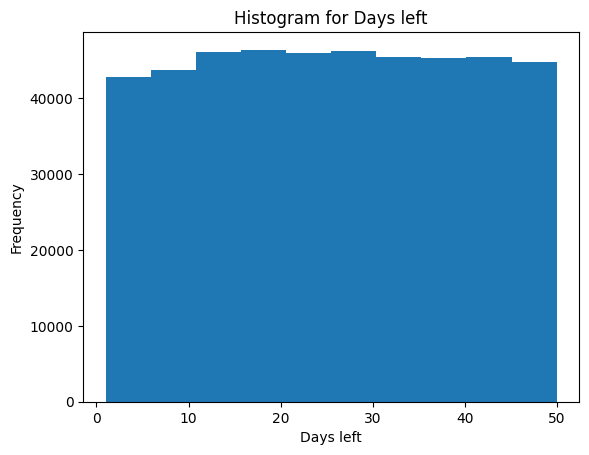

In [ ]:
plt.hist(df_analysis['Days_left'], bins=10)
plt.title("Histogram for Days left")
plt.ylabel('Frequency')
plt.xlabel('Days left')
plt.show()

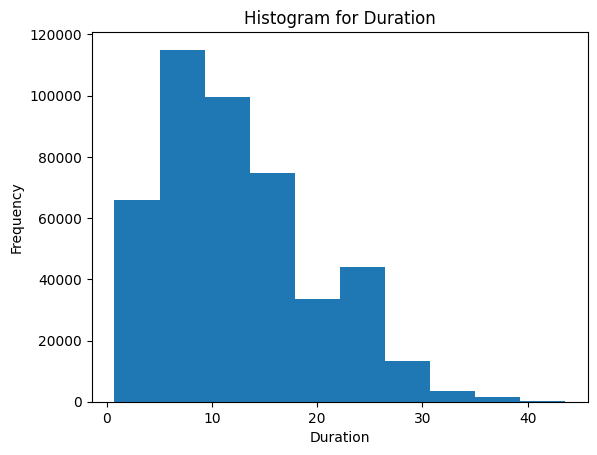

In [ ]:
plt.hist(df_analysis['Duration_in_hours'], bins=10)
plt.title("Histogram for Duration")
plt.ylabel('Frequency')
plt.xlabel('Duration')
plt.show()

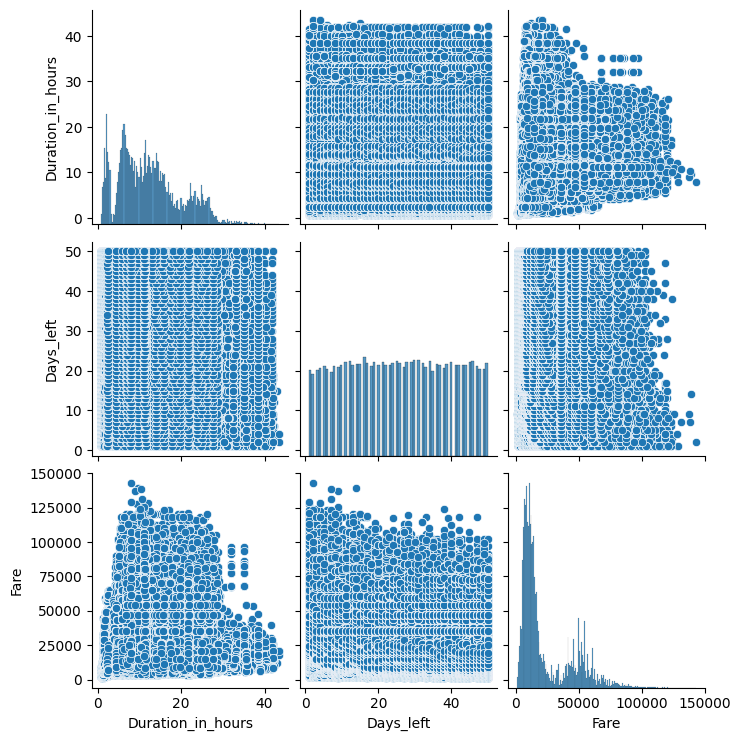

In [ ]:
sns.pairplot(df_analysis)
plt.show()

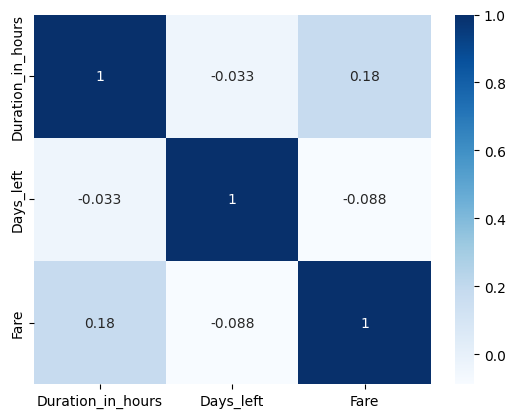

In [ ]:
corr = df_analysis[['Duration_in_hours',	'Days_left',	'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

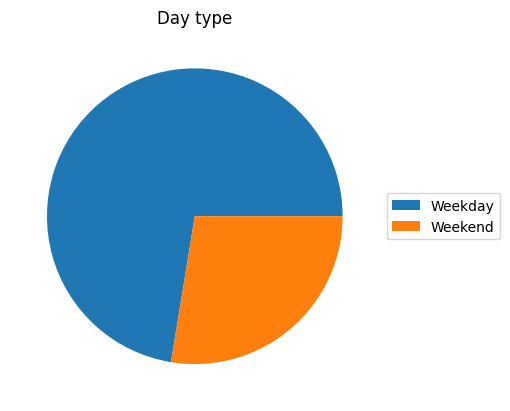

------------------------------------------------------------------------------


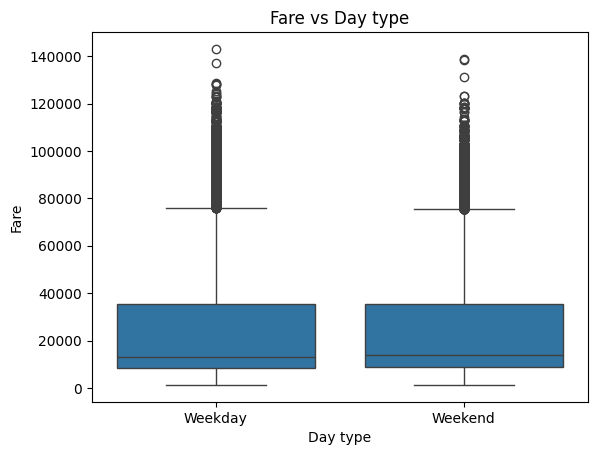

In [ ]:
# plt.scatter(df_analysis['day_type'], df_analysis['Fare'])
plt.pie(df_analysis['day_type'].value_counts(), labels=df_analysis['day_type'].value_counts().keys(), labeldistance=None)
plt.title('Day type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
sns.boxplot(x='day_type', y='Fare', data=df_analysis)
plt.title('Fare vs Day type')
plt.xlabel('Day type')
plt.ylabel('Fare')
plt.show()

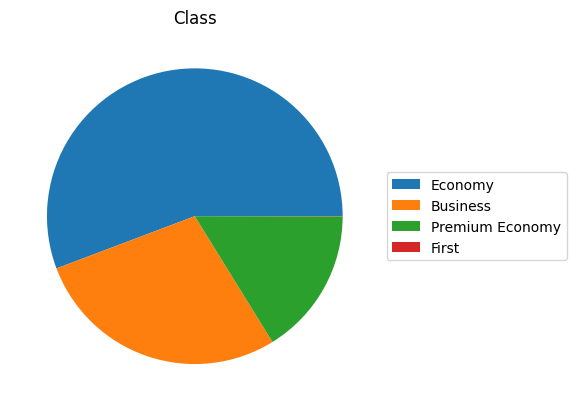

------------------------------------------------------------------------------


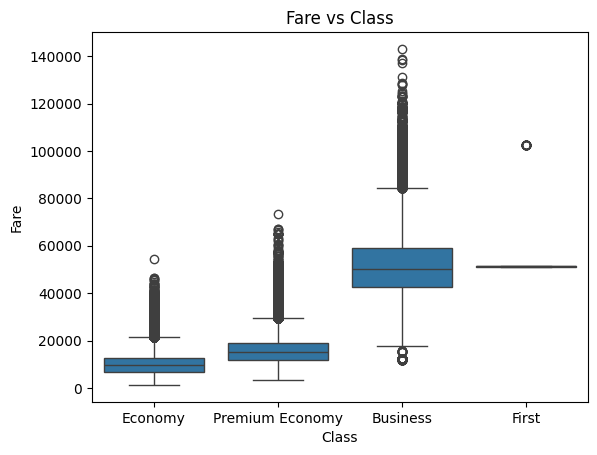

In [ ]:
# plt.scatter(df_analysis['Class'], df_analysis['Fare'])
plt.pie(df_analysis['Class'].value_counts(), labels=df_analysis['Class'].value_counts().keys(), labeldistance=None)
plt.title('Class')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')

sns.boxplot(x='Class', y='Fare', data=df_analysis)
plt.title('Fare vs Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

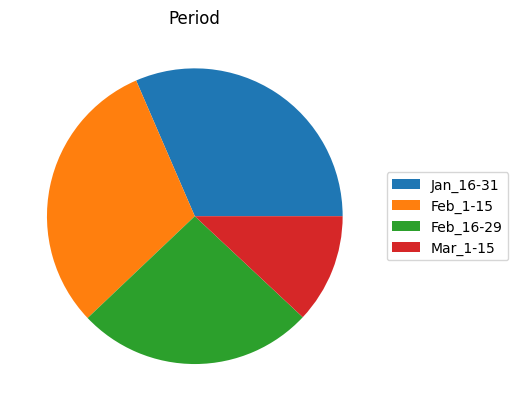

------------------------------------------------------------------------------


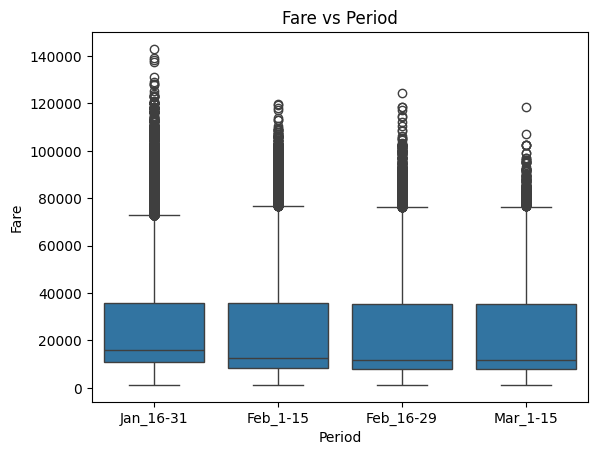

In [ ]:
# plt.scatter(df_analysis['period'], df_analysis['Fare'])
plt.pie(df_analysis['period'].value_counts(), labels=df_analysis['period'].value_counts().keys(), labeldistance=None)
plt.title('Period')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')

sns.boxplot(x='period', y='Fare', data=df_analysis)
plt.title('Fare vs Period')
plt.xlabel('Period')
plt.ylabel('Fare')
plt.show()

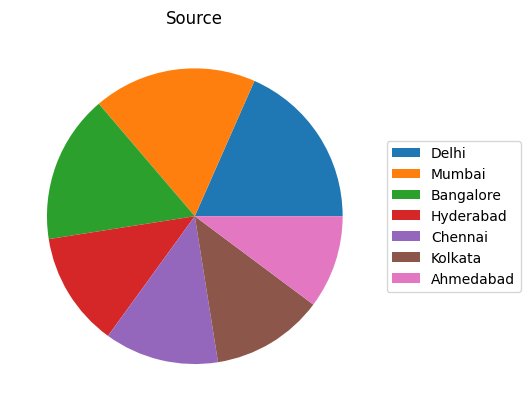

------------------------------------------------------------------------------


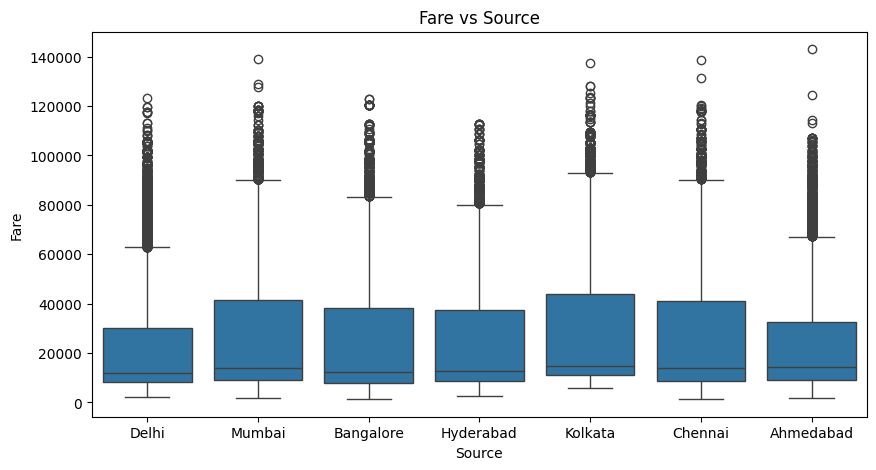

In [ ]:
# plt.scatter(df_analysis['Source'], df_analysis['Fare'])
plt.pie(df_analysis['Source'].value_counts(), labels=df_analysis['Source'].value_counts().keys(), labeldistance=None)
plt.title('Source')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
plt.figure(figsize=(10,5))
sns.boxplot(x='Source', y='Fare', data=df_analysis)
plt.title('Fare vs Source')
plt.xlabel('Source')
plt.ylabel('Fare')
plt.show()

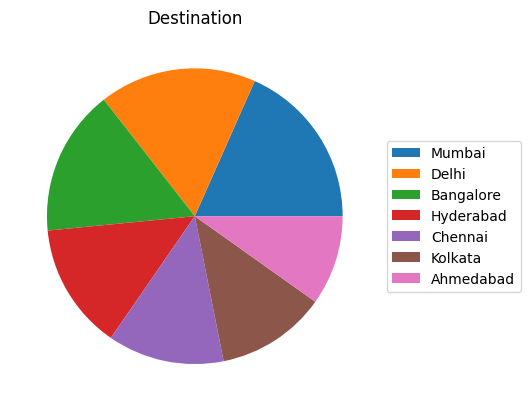

------------------------------------------------------------------------------


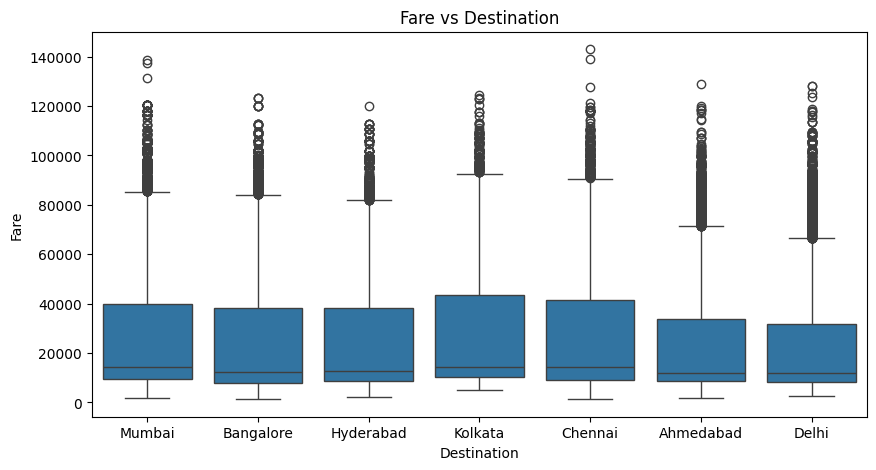

In [ ]:
plt.pie(df_analysis['Destination'].value_counts(), labels=df_analysis['Destination'].value_counts().keys(), labeldistance=None)
plt.title('Destination')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
plt.figure(figsize=(10,5))
# plt.scatter(df_analysis['Destination'], df_analysis['Fare'])
sns.boxplot(x='Destination', y='Fare', data=df_analysis)
plt.title('Fare vs Destination')
plt.xlabel('Destination')
plt.ylabel('Fare')
plt.show()

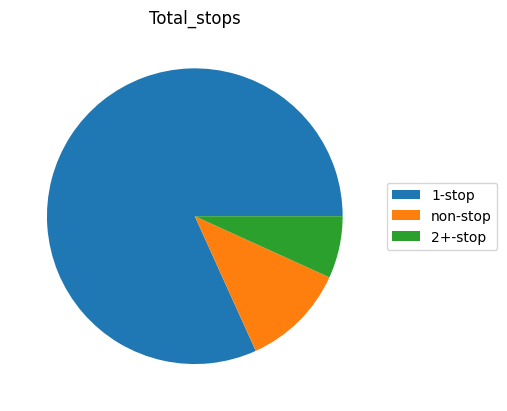

------------------------------------------------------------------------------


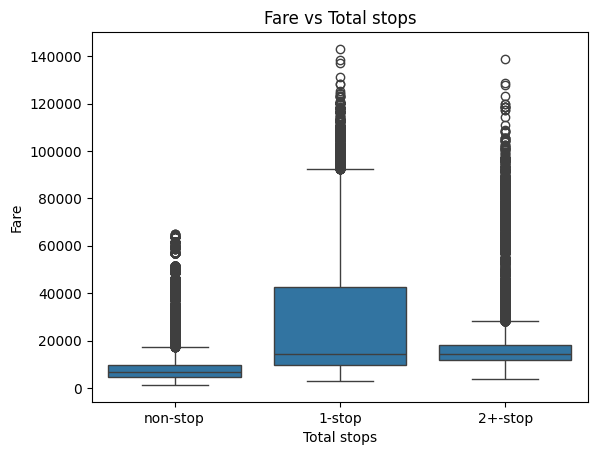

In [ ]:
plt.pie(df_analysis['Total_stops'].value_counts(), labels=df_analysis['Total_stops'].value_counts().keys(), labeldistance=None)
plt.title('Total_stops')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
# plt.scatter(df_analysis['Total_stops'], df_analysis['Fare'])
sns.boxplot(x='Total_stops', y='Fare', data=df_analysis)
plt.title('Fare vs Total stops')
plt.xlabel('Total stops')
plt.ylabel('Fare')
plt.show()

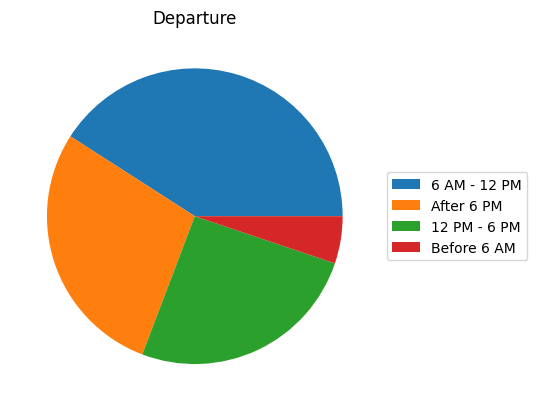

------------------------------------------------------------------------------


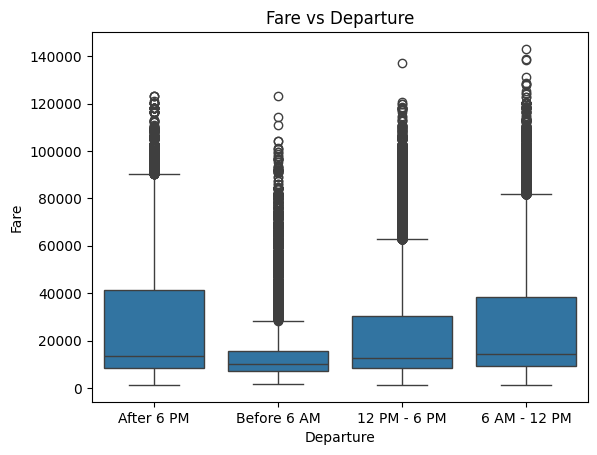

In [ ]:
plt.pie(df_analysis['Departure'].value_counts(), labels=df_analysis['Departure'].value_counts().keys(), labeldistance=None)
plt.title('Departure')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
# plt.scatter(df_analysis['Departure'], df_analysis['Fare'])
sns.boxplot(x='Departure', y='Fare', data=df_analysis)
plt.title('Fare vs Departure')
plt.xlabel('Departure')
plt.ylabel('Fare')
plt.show()

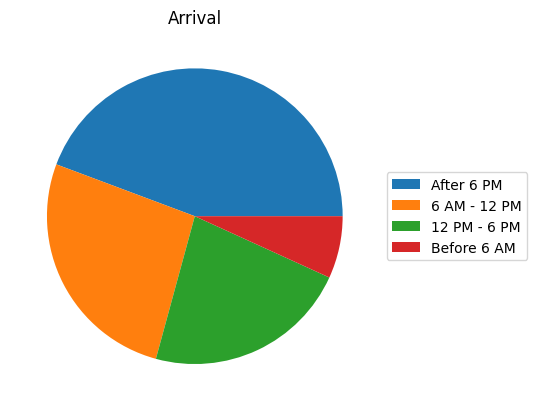

------------------------------------------------------------------------------


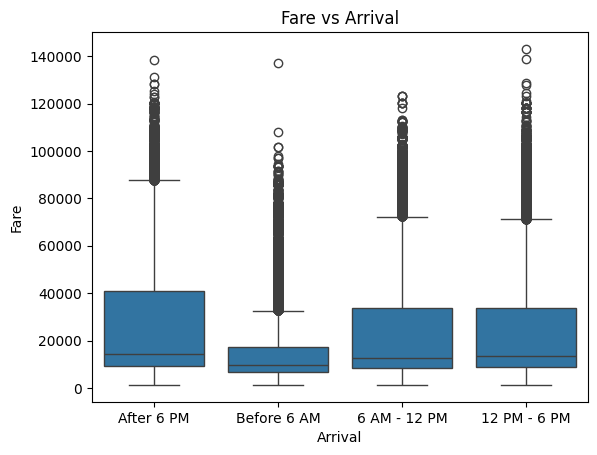

In [ ]:
plt.pie(df_analysis['Arrival'].value_counts(), labels=df_analysis['Arrival'].value_counts().keys(), labeldistance=None)
plt.title('Arrival')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
# plt.scatter(df_analysis['Arrival'], df_analysis['Fare'])
sns.boxplot(x='Arrival', y='Fare', data=df_analysis)
plt.title('Fare vs Arrival')
plt.xlabel('Arrival')
plt.ylabel('Fare')
plt.show()

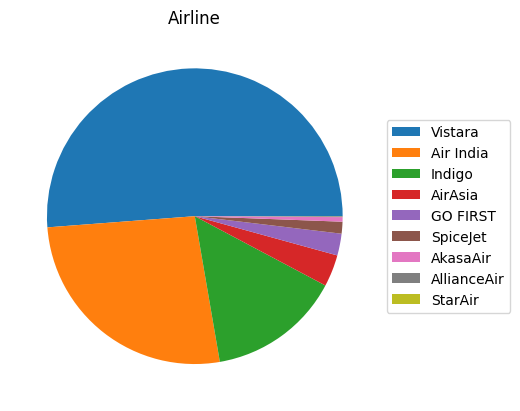

------------------------------------------------------------------------------


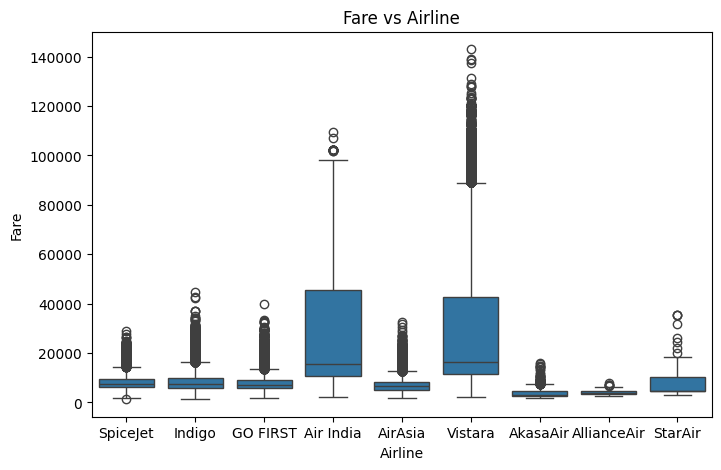

In [ ]:
plt.pie(df_analysis['Airline'].value_counts(), labels=df_analysis['Airline'].value_counts().keys(), labeldistance=None)
plt.title('Airline')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('------------------------------------------------------------------------------')
plt.figure(figsize=(8,5))
# plt.scatter(df_analysis['Airline'], df_analysis['Fare'])
sns.boxplot(x='Airline', y='Fare', data=df_analysis)
plt.title('Fare vs Airline')
plt.xlabel('Airline')
plt.ylabel('Fare')
plt.show()

In [ ]:
df_analysis[['Source', 'Fare']].groupby('Source').mean()

Fare
Source                 
Ahmedabad  22239.292522
Bangalore  23143.931244
Chennai    23099.396061
Delhi      20503.704340
Hyderabad  22003.107754
Kolkata    25553.745662
Mumbai     23851.997250

# **Mean and Variance tests**

## **Means**

In [ ]:
# Durations and Days left
t = ss.ttest_ind(df_analysis['Days_left'], df_analysis['Duration_in_hours'])
ci = t.confidence_interval()
print(f"The t statistic is {t.statistic}")
print(f"The p-value is {t.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The t statistic is 553.9825695124463
The p-value is 0.0
The confidence interval is [13.23170089558964,13.325659700135088]


In [ ]:
# Fare and Days left
t = ss.ttest_ind(df_analysis['Days_left'], df_analysis['Fare'])
ci = t.confidence_interval()
print(f"The t statistic is {t.statistic}")
print(f"The p-value is {t.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The t statistic is -755.3625680809668
The p-value is 0.0
The confidence interval is [-22873.670526767688,-22755.2754483522]


In [ ]:
# Durations and Fare left
t = ss.ttest_ind(df_analysis['Fare'], df_analysis['Duration_in_hours'])
ci = t.confidence_interval()
print(f"The t statistic is {t.statistic}")
print(f"The p-value is {t.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The t statistic is 755.8023476431712
The p-value is 0.0
The confidence interval is [22768.554139364358,22886.949196351256]


## **Variance**

In [ ]:
# Coeff of variation
print(f"CV for Days left = {df_analysis['Days_left'].std()/df_analysis['Days_left'].mean()*100}%")
print(f"CV for Duration = {df_analysis['Duration_in_hours'].std()/df_analysis['Duration_in_hours'].mean()*100}%")
print(f"CV for Fares = {df_analysis['Fare'].std()/df_analysis['Fare'].mean()*100}%")

CV for Days left = 55.80185947620716%
CV for Duration = 60.17770339501391%
CV for Fares = 88.91363089936002%


In [ ]:
# Durations and Days left
# Get variances
variance1 = df_analysis['Days_left'].var()
variance2 = df_analysis['Duration_in_hours'].var()

# Calculate the F-statistic
if variance1 > variance2:
    print('var1/var2')
    f_value = variance1 / variance2
    df1 = len(df_analysis['Days_left']) - 1
    df2 = len(df_analysis['Duration_in_hours']) - 1
else:
    print('var2/var1')
    f_value = variance2 / variance1
    df1 = len(df_analysis['Duration_in_hours']) - 1
    df2 = len(df_analysis['Days_left']) - 1

# Calculate the p-value (assuming a two-tailed test)
p_value = 2 * min(ss.f.cdf(f_value, df1, df2), 1 - ss.f.cdf(f_value, df1, df2))

# Calculate the confidence interval
alpha = 0.05  # significance level
upper_bound = ss.f.ppf(1 - alpha / 2, df2, df1) * f_value
lower_bound = (1 / ss.f.ppf(1 - alpha / 2, df1, df2)) * f_value

# Print the results
print('Degree of freedom 1:', df1)
print('Degree of freedom 2:', df2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print("95% Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

var1/var2
Degree of freedom 1: 452087
Degree of freedom 2: 452087
F-statistic: 3.703164925223069
p-value: 2.220446049250313e-16
95% Confidence Interval: [3.6816, 3.7248]


In [ ]:
# Fares and Days left
# Get variances
variance1 = df_analysis['Fare'].var()
variance2 = df_analysis['Duration_in_hours'].var()

# Calculate the F-statistic
if variance1 > variance2:
    print('var1/var2')
    f_value = variance1 / variance2
    df1 = len(df_analysis['Fare']) - 1
    df2 = len(df_analysis['Duration_in_hours']) - 1
else:
    print('var2/var1')
    f_value = variance2 / variance1
    df1 = len(df_analysis['Duration_in_hours']) - 1
    df2 = len(df_analysis['Fare']) - 1

# Calculate the p-value (assuming a two-tailed test)
p_value = 2 * min(ss.f.cdf(f_value, df1, df2), 1 - ss.f.cdf(f_value, df1, df2))

# Calculate the confidence interval
alpha = 0.05  # significance level
upper_bound = ss.f.ppf(1 - alpha / 2, df2, df1) * f_value
lower_bound = (1 / ss.f.ppf(1 - alpha / 2, df1, df2)) * f_value

# Print the results
print('Degree of freedom 1:', df1)
print('Degree of freedom 2:', df2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print("95% Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

var1/var2
Degree of freedom 1: 452087
Degree of freedom 2: 452087
F-statistic: 7467622.007574529
p-value: 2.220446049250313e-16
95% Confidence Interval: [7424212.5258, 7511285.3052]


In [ ]:
df_analysis['Fare'].std(), df_analysis['Duration_in_hours'].std()

(20307.96300206467, 7.431478061579924)

In [ ]:
# Durations and Fares
# Get variances
variance1 = df_analysis['Days_left'].var()
variance2 = df_analysis['Fare'].var()

# Calculate the F-statistic
if variance1 > variance2:
    print('var1/var2')
    f_value = variance1 / variance2
    df1 = len(df_analysis['Days_left']) - 1
    df2 = len(df_analysis['Fare']) - 1
else:
    print('var2/var1')
    f_value = variance2 / variance1
    df1 = len(df_analysis['Fare']) - 1
    df2 = len(df_analysis['Days_left']) - 1

# Calculate the p-value (assuming a two-tailed test)
p_value = 2 * min(ss.f.cdf(f_value, df1, df2), 1 - ss.f.cdf(f_value, df1, df2))

# Calculate the confidence interval
alpha = 0.05  # significance level
upper_bound = ss.f.ppf(1 - alpha / 2, df2, df1) * f_value
lower_bound = (1 / ss.f.ppf(1 - alpha / 2, df1, df2)) * f_value

# Print the results
print('Degree of freedom 1:', df1)
print('Degree of freedom 2:', df2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print("95% Confidence Interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

var2/var1
Degree of freedom 1: 452087
Degree of freedom 2: 452087
F-statistic: 2016551.290143984
p-value: 2.220446049250313e-16
95% Confidence Interval: [2004829.0248, 2028342.0957]


# **Correlation tests**

In [ ]:
# Durations and Days left
r = ss.pearsonr(df_analysis['Days_left'], df_analysis['Duration_in_hours'])
ci = r.confidence_interval()
print(f"The correlation is {r.statistic}")
print(f"The p-value is {r.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The correlation is -0.032878409609151574
The p-value is 2.3944244097371408e-108
The confidence interval is [-0.03578996776670805,-0.029966293309595642]


In [ ]:
# Fare and Days left
r = ss.pearsonr(df_analysis['Days_left'], df_analysis['Fare'])
ci = r.confidence_interval()
print(f"The correlation is {r.statistic}")
print(f"The p-value is {r.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The correlation is -0.08785163704453175
The p-value is 0.0
The confidence interval is [-0.09074338716330763,-0.0849584054700885]


In [ ]:
# Durations and Fare
r = ss.pearsonr(df_analysis['Fare'], df_analysis['Duration_in_hours'])
ci = r.confidence_interval()
print(f"The correlation is {r.statistic}")
print(f"The p-value is {r.pvalue}")
print(f"The confidence interval is [{ci.low},{ci.high}]")

The correlation is 0.17990877445666187
The p-value is 0.0
The confidence interval is [0.1770866560857662,0.18272793436088958]


# **Chi Square tests**

In [ ]:
cols_to_check = ['period', 'day_type', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']

# Assuming df_analysis is your DataFrame

for i in range(len(cols_to_check)):
    for j in range(i+1, len(cols_to_check)):
        col1 = cols_to_check[i]
        col2 = cols_to_check[j]
        ct = pd.crosstab(df_analysis[col1], df_analysis[col2])
        chi2, p, df, _ = ss.chi2_contingency(ct)
        print(f"Chi-square test between {col1} and {col2}:")
        print(f"df = {df}")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print("-------------")

Chi-square test between period and day_type:
df = 3
Chi-square statistic: 1710.6326776257754
P-value: 0.0
-------------
Chi-square test between period and Airline:
df = 24
Chi-square statistic: 66.80216533281198
P-value: 6.59770007881794e-06
-------------
Chi-square test between period and Class:
df = 9
Chi-square statistic: 222.8078682659546
P-value: 5.371911923692381e-43
-------------
Chi-square test between period and Source:
df = 18
Chi-square statistic: 529.3601059140974
P-value: 6.925314340239309e-101
-------------
Chi-square test between period and Departure:
df = 9
Chi-square statistic: 141.69104826874252
P-value: 4.6164449355378605e-26
-------------
Chi-square test between period and Total_stops:
df = 6
Chi-square statistic: 177.4534888033459
P-value: 1.1785072929611161e-35
-------------
Chi-square test between period and Arrival:
df = 9
Chi-square statistic: 80.23188418332131
P-value: 1.453481266001729e-13
-------------
Chi-square test between period and Destination:
df = 18


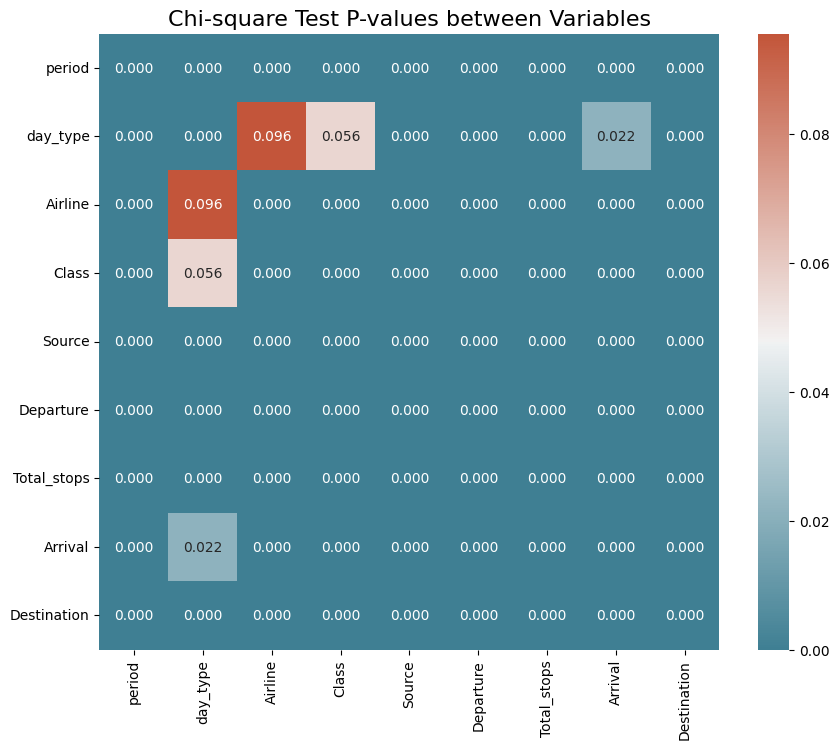

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

# Assuming df_analysis is your DataFrame
# Assuming cols_to_check is defined as in your code

p_values = np.zeros((len(cols_to_check), len(cols_to_check)))

for i in range(len(cols_to_check)):
    for j in range(len(cols_to_check)):
        if i != j:  # Skip comparing a variable to itself
            col1 = cols_to_check[i]
            col2 = cols_to_check[j]
            ct = pd.crosstab(df_analysis[col1], df_analysis[col2])
            chi2, p, df, _ = ss.chi2_contingency(ct)
            p_values[i, j] = p

# Create a DataFrame from the p-values
p_values_df = pd.DataFrame(p_values, columns=cols_to_check, index=cols_to_check)

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True,  cmap=cmap, fmt=".3f")
plt.title('Chi-square Test P-values between Variables', fontsize=16)

plt.show()

## **Day time and Airline**

In [ ]:
# Exploring day type and Airline
ct = pd.crosstab(df_analysis.day_type, df_analysis.Airline)

# Add column totals
ct.loc['Total'] = ct.sum()

# Convert counts to proportions by column
ct_proportions_by_column = ct.div(ct.loc['Total'])

ct_proportions_by_column

Airline   Air India   AirAsia  AkasaAir  AllianceAir  GO FIRST    Indigo  \
day_type                                                                   
Weekday    0.726554  0.721073  0.719731     0.725191  0.717133  0.723694   
Weekend    0.273446  0.278927  0.280269     0.274809  0.282867  0.276306   
Total      1.000000  1.000000  1.000000     1.000000  1.000000  1.000000   

Airline   SpiceJet   StarAir   Vistara  
day_type                                
Weekday   0.737848  0.693548  0.723452  
Weekend   0.262152  0.306452  0.276548  
Total     1.000000  1.000000  1.000000

In [ ]:
alpha = 0.05

# Create the contingency table
ct = pd.crosstab(df_analysis.day_type, df_analysis.Airline)

# Add column totals
ct.loc['Total'] = ct.sum()

# Perform proportions test for each column against all pairs of rows
for i, row in ct.iterrows():
  # print(row)
  if row.name != 'Total':
    for j in range(len(row)):
      for k in range(j+1, len(row)):
        counts = []
        nobs = []
        counts.append(row.iloc[j])
        counts.append(row.iloc[k])
        nobs.append(ct.iloc[-1, j])
        nobs.append(ct.iloc[-1, k])
        stat, pval = sms.proportions_ztest(counts, nobs, alternative='two-sided')
        p1 = (counts[0]/nobs[0])
        p2 = (counts[1]/nobs[1])
        diff = p1 - p2
        z = ss.norm.ppf(1-alpha/2)
        value = np.sqrt((p1*(1-p1)/nobs[0]) + (p2*(1-p2)/nobs[1]))
        ci_low = diff - z*value
        ci_upp = diff + z*value
        if pval < 0.05:
          print(f"Day type: {i}, Row 1: {ct.columns[j]}, Row 2: {ct.columns[k]}")
          print(f"Z-score: {stat}")
          print(f"P-value: {pval}")
          print(f"Difference: {diff}")
          print(f"CI (95%): [{ci_low}, {ci_upp}]")
          print("-------------")

Day type: Weekday, Row 1: Air India, Row 2: GO FIRST
Z-score: 2.1006854550331995
P-value: 0.03566858695287352
Difference: 0.009421030210352899
CI (95%): [0.0005545201251155648, 0.01828754029559023]
-------------
Day type: Weekday, Row 1: AirAsia, Row 2: SpiceJet
Z-score: -2.4575706643390323
P-value: 0.013988028848225885
Difference: -0.016774186693607973
CI (95%): [-0.030031136971164538, -0.003517236416051407]
-------------
Day type: Weekday, Row 1: GO FIRST, Row 2: SpiceJet
Z-score: -2.8572548477982322
P-value: 0.004273225889032646
Difference: -0.0207141973636934
CI (95%): [-0.03482028466735703, -0.0066081100600297645]
-------------
Day type: Weekday, Row 1: Indigo, Row 2: SpiceJet
Z-score: -2.325177535068295
P-value: 0.020062469068235098
Difference: -0.014153889129883024
CI (95%): [-0.025919689555927897, -0.002388088703838151]
-------------
Day type: Weekday, Row 1: SpiceJet, Row 2: Vistara
Z-score: 2.434592010470472
P-value: 0.014908588953815185
Difference: 0.014395101384267028
CI (9

In [ ]:
# Exploring day type and Airline
ct = pd.crosstab(df_analysis.Airline, df_analysis.day_type)

# Add column totals
ct.loc['Total'] = ct.sum()

# Convert counts to proportions by column
ct_proportions_by_column = ct.div(ct.loc['Total'])

ct_proportions_by_column

day_type      Weekday   Weekend
Airline                        
Air India    0.265930  0.262860
AirAsia      0.034717  0.035270
AkasaAir     0.004902  0.005013
AllianceAir  0.000870  0.000866
GO FIRST     0.023624  0.024473
Indigo       0.145125  0.145524
SpiceJet     0.013212  0.012329
StarAir      0.000131  0.000152
Vistara      0.511488  0.513512
Total        1.000000  1.000000

In [ ]:
alpha = 0.05

# Create the contingency table
ct = pd.crosstab(df_analysis['Airline'], df_analysis['day_type'])

# Add column totals
ct.loc['Total'] = ct.sum()

# Perform proportions test for each column against all pairs of rows
for i, row in ct.iterrows():
  # print(row)
  if row.name != 'Total':
    for j in range(len(row)):
      for k in range(j+1, len(row)):
        counts = []
        nobs = []
        counts.append(row.iloc[j])
        counts.append(row.iloc[k])
        nobs.append(ct.iloc[-1, j])
        nobs.append(ct.iloc[-1, k])
        stat, pval = sms.proportions_ztest(counts, nobs, alternative='two-sided')
        p1 = (counts[0]/nobs[0])
        p2 = (counts[1]/nobs[1])
        diff = p1 - p2
        z = ss.norm.ppf(1-alpha/2)
        value = np.sqrt((p1*(1-p1)/nobs[0]) + (p2*(1-p2)/nobs[1]))
        ci_low = diff - z*value
        ci_upp = diff + z*value
        if pval < 0.05:
          print(f"Airline: {i}, Row 1: {ct.columns[j]}, Row 2: {ct.columns[k]}")
          print(f"Z-score: {stat}")
          print(f"P-value: {pval}")
          print(f"Difference: {diff}")
          print(f"CI (95%): [{ci_low}, {ci_upp}]")
          print("-------------")

Airline: Air India, Row 1: Weekday, Row 2: Weekend
Z-score: 2.0896817328793804
P-value: 0.03664639900412355
Difference: 0.0030695370740212446
CI (95%): [0.0001953537305255, 0.005943720417516989]
-------------
Airline: SpiceJet, Row 1: Weekday, Row 2: Weekend
Z-score: 2.3464527931387105
P-value: 0.018953066938730695
Difference: 0.0008835033654151867
CI (95%): [0.00015674359338067325, 0.0016102631374497003]
-------------


## **Day type and Class**

In [ ]:
# Exploring day type and Class
ct = pd.crosstab(df_analysis.day_type, df_analysis.Class)

# Add column totals
ct.loc['Total'] = ct.sum()

# Convert counts to proportions by column
ct_proportions_by_column = ct.div(ct.loc['Total'])

ct_proportions_by_column

Class     Business   Economy  First  Premium Economy
day_type                                            
Weekday   0.721439  0.725143   0.75         0.725947
Weekend   0.278561  0.274857   0.25         0.274053
Total     1.000000  1.000000   1.00         1.000000

In [ ]:
alpha = 0.05

# Create the contingency table
ct = pd.crosstab(df_analysis.day_type, df_analysis.Class)

# Add column totals
ct.loc['Total'] = ct.sum()

# Perform proportions test for each column against all pairs of rows
for i, row in ct.iterrows():
  # print(row)
  if row.name != 'Total':
    for j in range(len(row)):
      for k in range(j+1, len(row)):
        counts = []
        nobs = []
        counts.append(row.iloc[j])
        counts.append(row.iloc[k])
        nobs.append(ct.iloc[-1, j])
        nobs.append(ct.iloc[-1, k])
        stat, pval = sms.proportions_ztest(counts, nobs, alternative='two-sided')
        p1 = (counts[0]/nobs[0])
        p2 = (counts[1]/nobs[1])
        diff = p1 - p2
        z = ss.norm.ppf(1-alpha/2)
        value = np.sqrt((p1*(1-p1)/nobs[0]) + (p2*(1-p2)/nobs[1]))
        ci_low = diff - z*value
        ci_upp = diff + z*value
        if pval < 0.05:
          print(f"Day type: {i}, Row 1: {ct.columns[j]}, Row 2: {ct.columns[k]}")
          print(f"Z-score: {stat}")
          print(f"P-value: {pval}")
          print(f"Difference: {diff}")
          print(f"CI (95%): [{ci_low}, {ci_upp}]")
          print("-------------")

Day type: Weekday, Row 1: Business, Row 2: Economy
Z-score: -2.4066541122070175
P-value: 0.0160994097313118
Difference: -0.0037040897053993715
CI (95%): [-0.006724776401024504, -0.0006834030097742387]
-------------
Day type: Weekday, Row 1: Business, Row 2: Premium Economy
Z-score: -2.169022785749566
P-value: 0.03008095405021178
Difference: -0.004507557954229302
CI (95%): [-0.008575092840312389, -0.0004400230681462164]
-------------
Day type: Weekend, Row 1: Business, Row 2: Economy
Z-score: 2.40665411220709
P-value: 0.016099409731308606
Difference: 0.0037040897053994826
CI (95%): [0.0006834030097743497, 0.0067247764010246154]
-------------
Day type: Weekend, Row 1: Business, Row 2: Premium Economy
Z-score: 2.1690227857496196
P-value: 0.030080954050207696
Difference: 0.004507557954229413
CI (95%): [0.00044002306814632745, 0.0085750928403125]
-------------


In [ ]:
# Exploring day type and Class
ct = pd.crosstab(df_analysis.Class, df_analysis.day_type)

# Add column totals
ct.loc['Total'] = ct.sum()

# Convert counts to proportions by column
ct_proportions_by_column = ct.div(ct.loc['Total'])

ct_proportions_by_column

day_type          Weekday   Weekend
Class                              
Business         0.279466  0.283403
Economy          0.558180  0.555664
First            0.000330  0.000289
Premium Economy  0.162024  0.160644
Total            1.000000  1.000000

In [ ]:
alpha = 0.05

# Create the contingency table
ct = pd.crosstab(df_analysis['Class'], df_analysis['day_type'])

# Add column totals
ct.loc['Total'] = ct.sum()

# Perform proportions test for each column against all pairs of rows
for i, row in ct.iterrows():
  # print(row)
  if row.name != 'Total':
    for j in range(len(row)):
      for k in range(j+1, len(row)):
        counts = []
        nobs = []
        counts.append(row.iloc[j])
        counts.append(row.iloc[k])
        nobs.append(ct.iloc[-1, j])
        nobs.append(ct.iloc[-1, k])
        stat, pval = sms.proportions_ztest(counts, nobs, alternative='two-sided')
        p1 = (counts[0]/nobs[0])
        p2 = (counts[1]/nobs[1])
        diff = p1 - p2
        z = ss.norm.ppf(1-alpha/2)
        value = np.sqrt((p1*(1-p1)/nobs[0]) + (p2*(1-p2)/nobs[1]))
        ci_low = diff - z*value
        ci_upp = diff + z*value
        if pval < 0.05:
          print(f"Airline: {i}, Row 1: {ct.columns[j]}, Row 2: {ct.columns[k]}")
          print(f"Z-score: {stat}")
          print(f"P-value: {pval}")
          print(f"Difference: {diff}")
          print(f"CI (95%): [{ci_low}, {ci_upp}]")
          print("-------------")

Airline: Business, Row 1: Weekday, Row 2: Weekend
Z-score: -2.6332233105671694
P-value: 0.008457871756848194
Difference: -0.003937099125948806
CI (95%): [-0.006873140877272512, -0.0010010573746251005]
-------------


# **ANOVA tests**

## **One way**

In [ ]:
df_analysis['period'] = df_analysis['period'].astype(str)
df_analysis['period'].value_counts().sort_index()

<ipython-input-18-a4bbe3fd9323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['period'] = df_analysis['period'].astype(str)


period
Feb_1-15     138316
Feb_16-29    117269
Jan_16-31    142391
Mar_1-15      54112
Name: count, dtype: int64

ANOVA test for period
statistic = 1183.8165718563046
pvalue = 0.0
df = (3.0, 452084.0)
df_num = 3.0
df_denom = 452084.0
nobs_t = 452088.0
n_groups = 4
means = [22277.86288643 21269.03218242 25394.32533657 20960.76903459]
nobs = [138316. 117269. 142391.  54112.]
vars_ = [4.07638443e+08 3.76417402e+08 4.59768536e+08 3.51181677e+08]
use_var = equal
welch_correction = True
tuple = (1183.8165718563046, 0.0)
Fisher's LSD


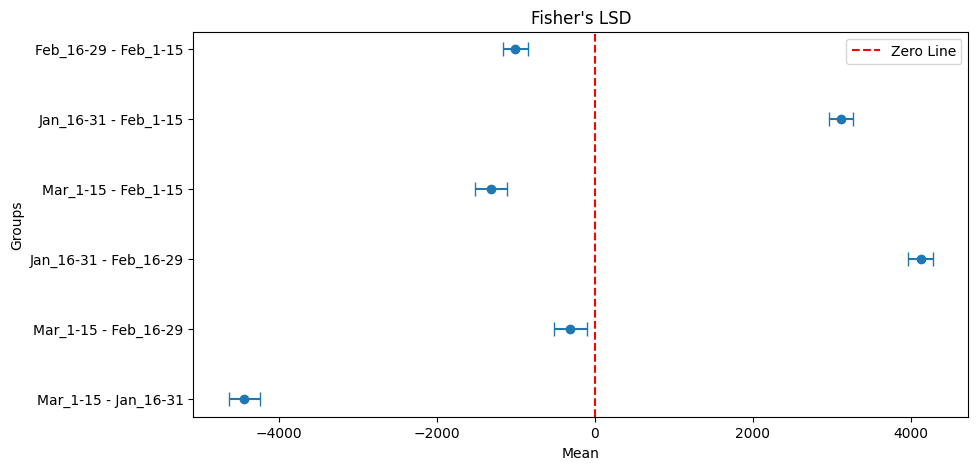

Bonferroni's LSD


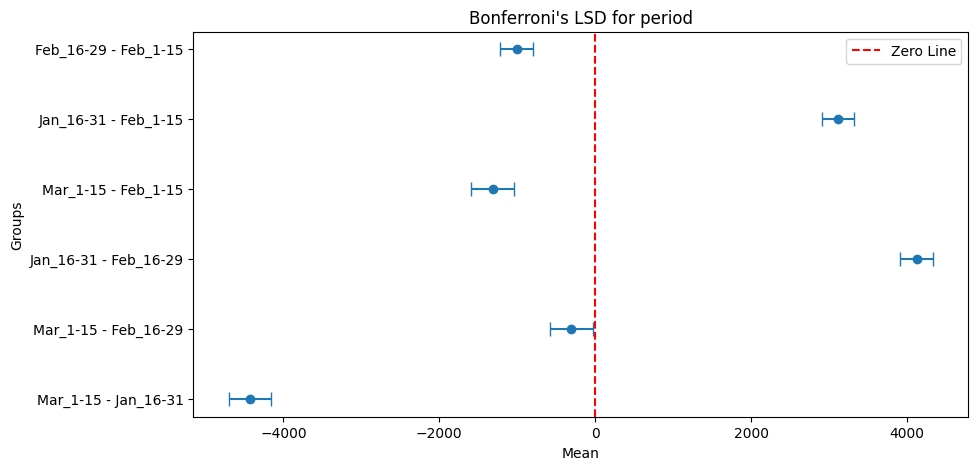

Tukey's LSD


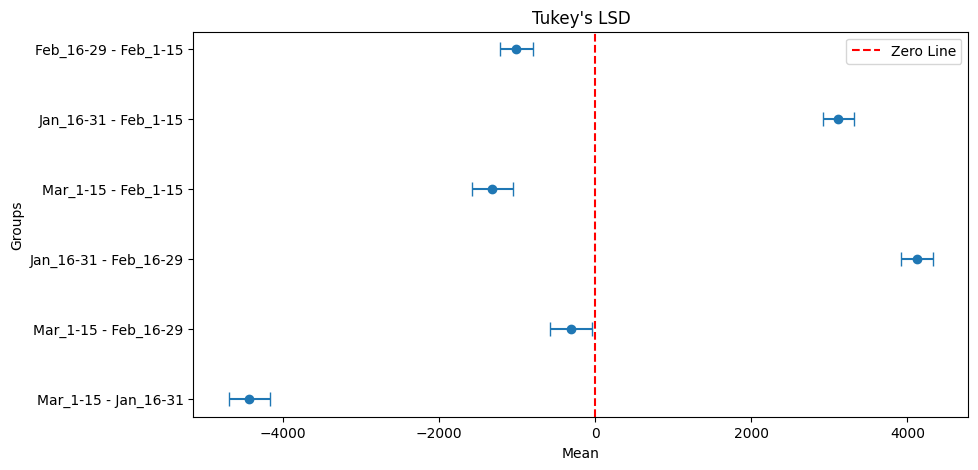

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for day_type
statistic = 14.874621107399372
pvalue = 0.00011491435725455698
df = (1.0, 452086.0)
df_num = 1.0
df_denom = 452086.0
nobs_t = 452088.0
n_groups = 2
means = [22768.22327523 23028.87771423]
nobs = [327421. 124667.]
vars_ = [4.16353446e+08 4.02019314e+08]
use_var = equal
welch_correction = True
tuple = (14.874621107399372, 0.00011491435725455698)
Fisher's LSD


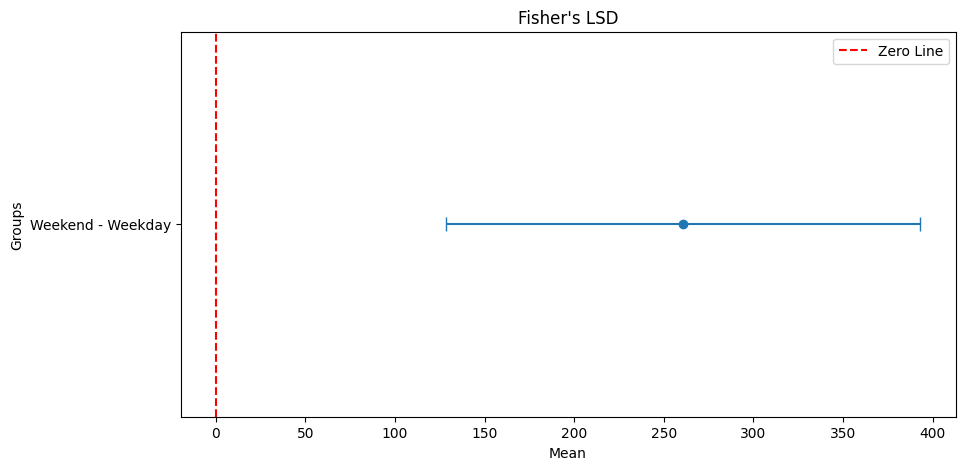

Bonferroni's LSD


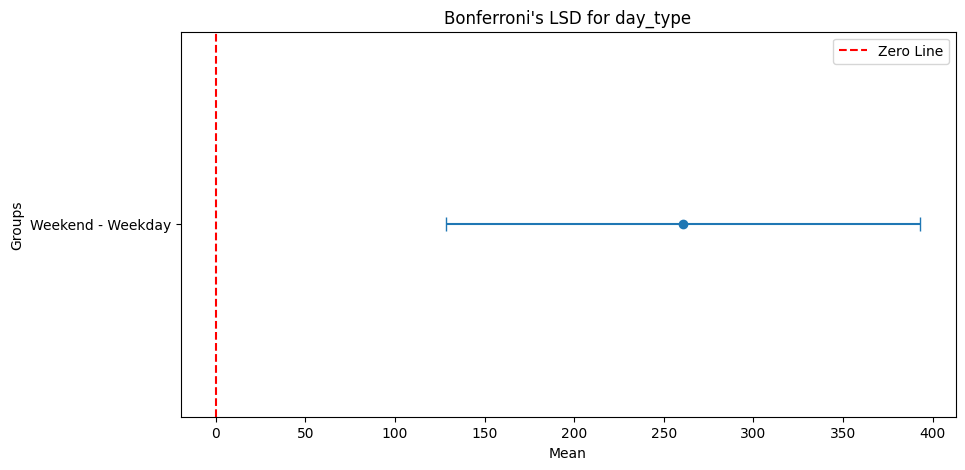

Tukey's LSD


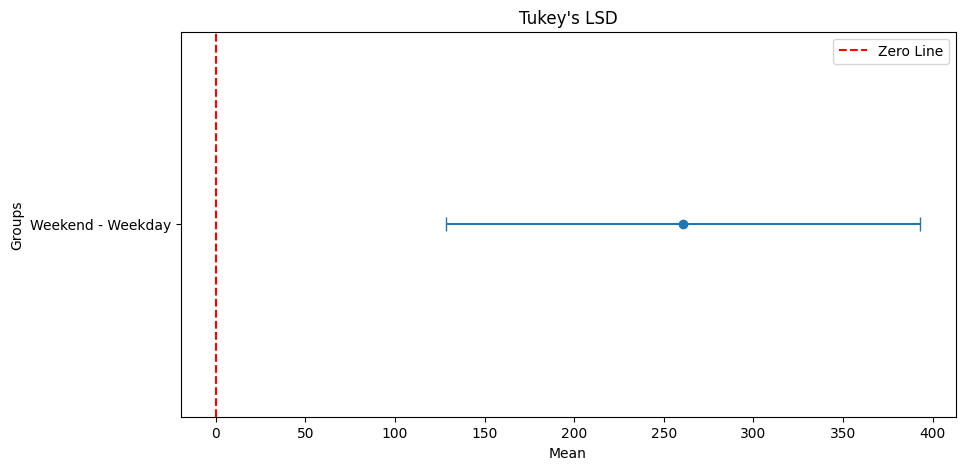

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Airline
statistic = 10441.230218778072
pvalue = 0.0
df = (8.0, 452079.0)
df_num = 8.0
df_denom = 452079.0
nobs_t = 452088.0
n_groups = 9
means = [26914.5936616   7092.26592235  3570.03452915  4077.50127226
      8015.07500464  8198.75480894  8109.77315368  9792.77419355
     27240.78882025]
nobs = [1.19841e+05 1.57640e+04 2.23000e+03 3.93000e+02 1.07860e+04 6.56590e+04
     5.86300e+03 6.20000e+01 2.31490e+05]
vars_ = [3.75757805e+08 9.76866518e+06 3.10698432e+06 5.45564797e+05
     1.53865982e+07 1.28172614e+07 9.42932078e+06 7.47836315e+07
     4.79981799e+08]
use_var = equal
welch_correction = True
tuple = (10441.230218778072, 0.0)
Fisher's LSD


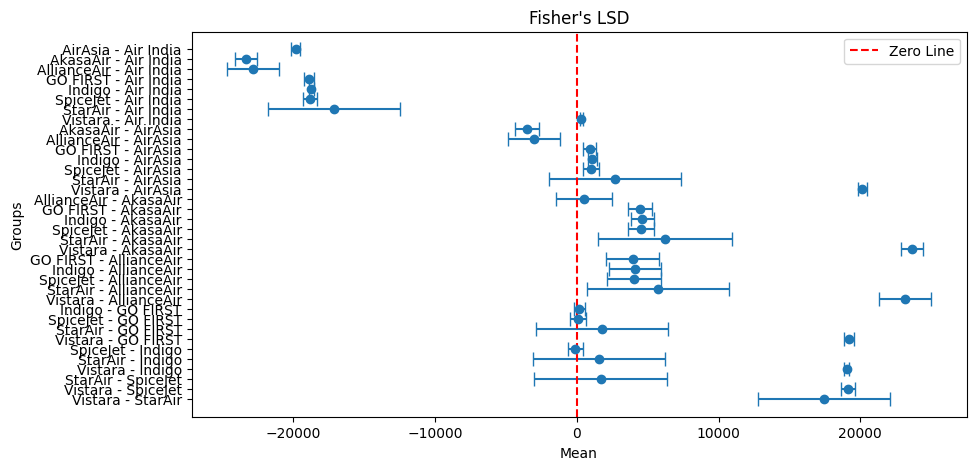

Bonferroni's LSD


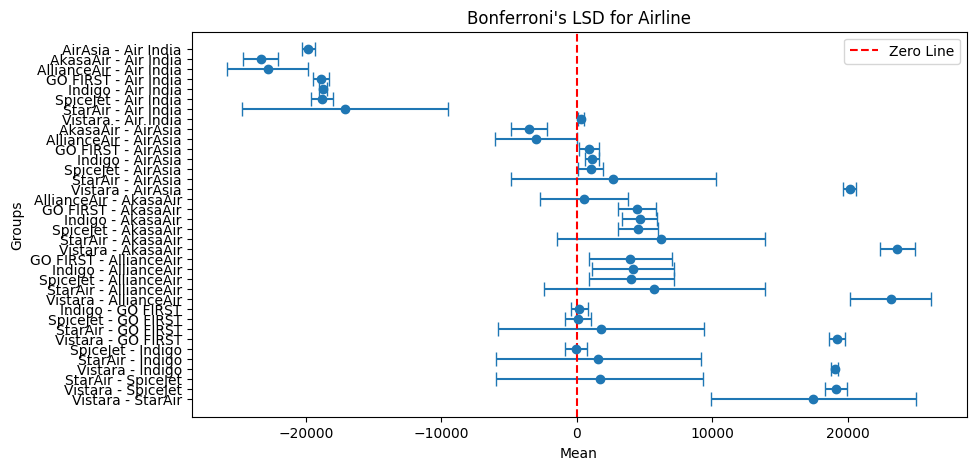

Tukey's LSD


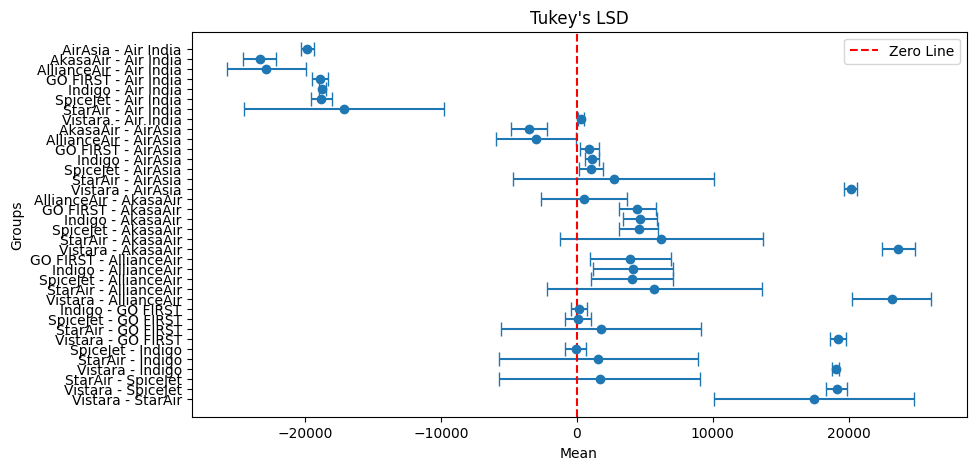

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Class
statistic = 599096.9064252251
pvalue = 0.0
df = (3.0, 452084.0)
df_num = 3.0
df_denom = 452084.0
nobs_t = 452088.0
n_groups = 4
means = [51669.5554662  10206.85066638 60731.0625     16298.84458858]
nobs = [1.26834e+05 2.52033e+05 1.44000e+02 7.30770e+04]
vars_ = [2.26639962e+08 2.09113603e+07 4.02009009e+08 4.65159981e+07]
use_var = equal
welch_correction = True
tuple = (599096.9064252251, 0.0)
Fisher's LSD


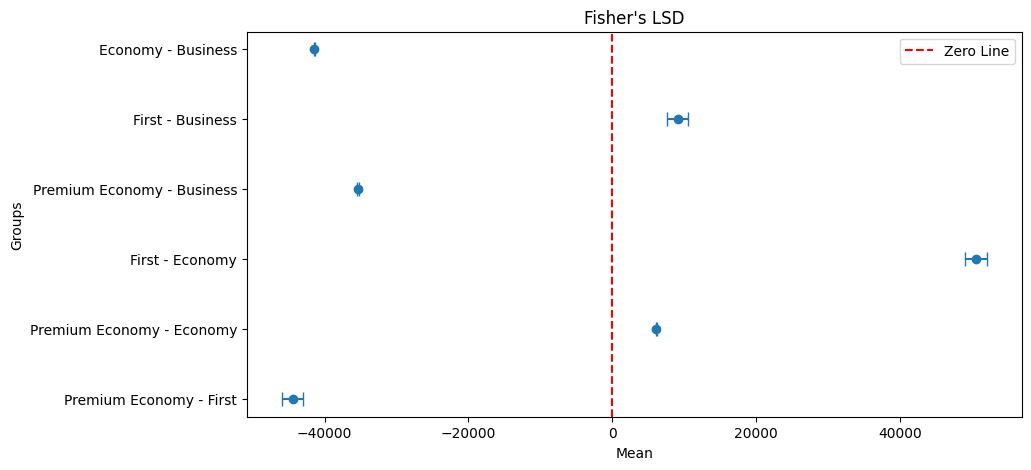

Bonferroni's LSD


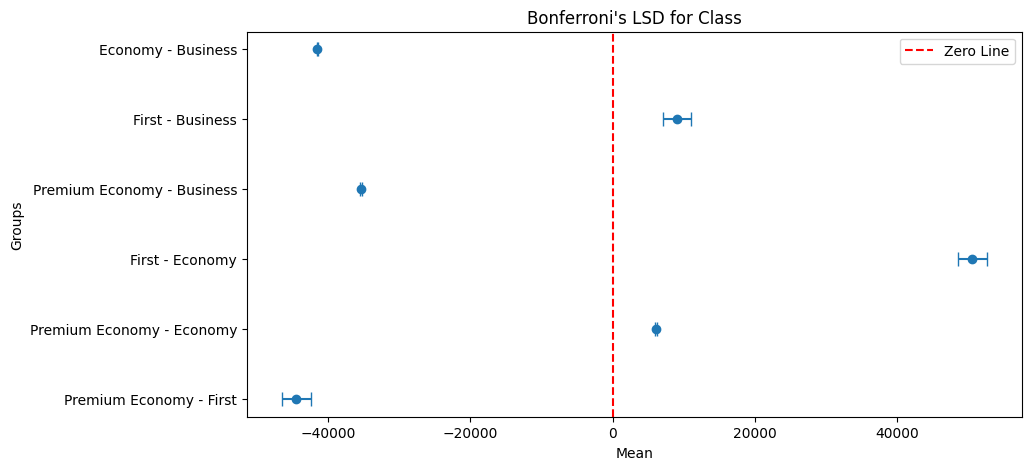

Tukey's LSD


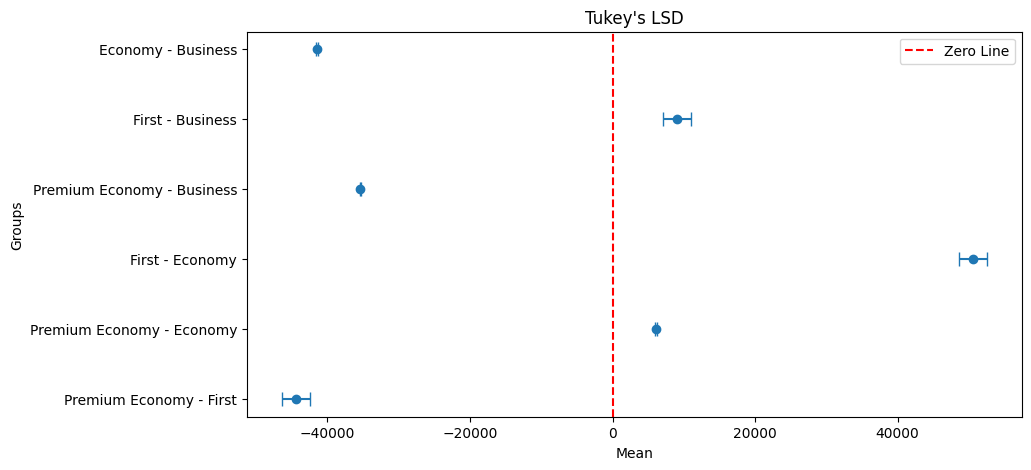

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Source
statistic = 411.45066728161146
pvalue = 0.0
df = (6.0, 452081.0)
df_num = 6.0
df_denom = 452081.0
nobs_t = 452088.0
n_groups = 7
means = [22239.29252158 23143.93124361 23099.39606115 20503.70434019
     22003.10775368 25553.74566235 23851.99724985]
nobs = [46106. 73375. 56514. 83153. 56657. 55560. 80723.]
vars_ = [3.43893367e+08 4.70663290e+08 4.10545363e+08 3.29894402e+08
     3.83518240e+08 4.72689962e+08 4.51192197e+08]
use_var = equal
welch_correction = True
tuple = (411.45066728161146, 0.0)
Fisher's LSD


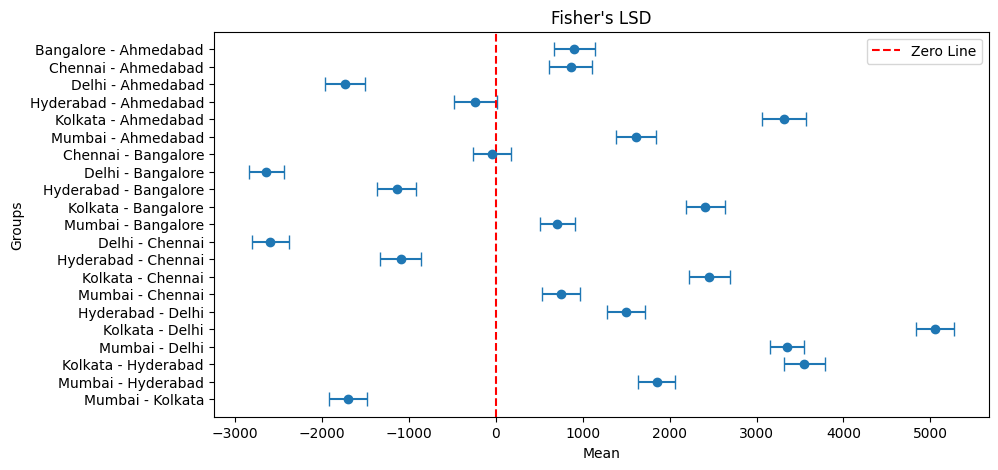

Bonferroni's LSD


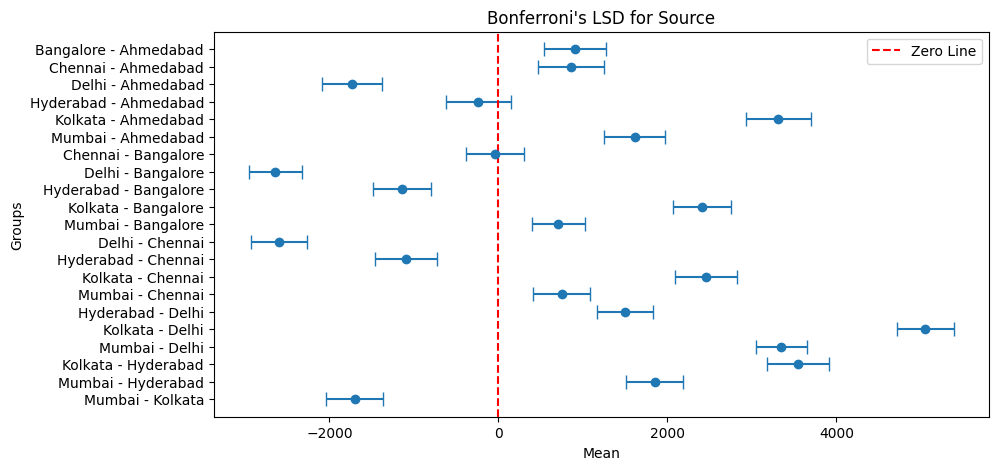

Tukey's LSD


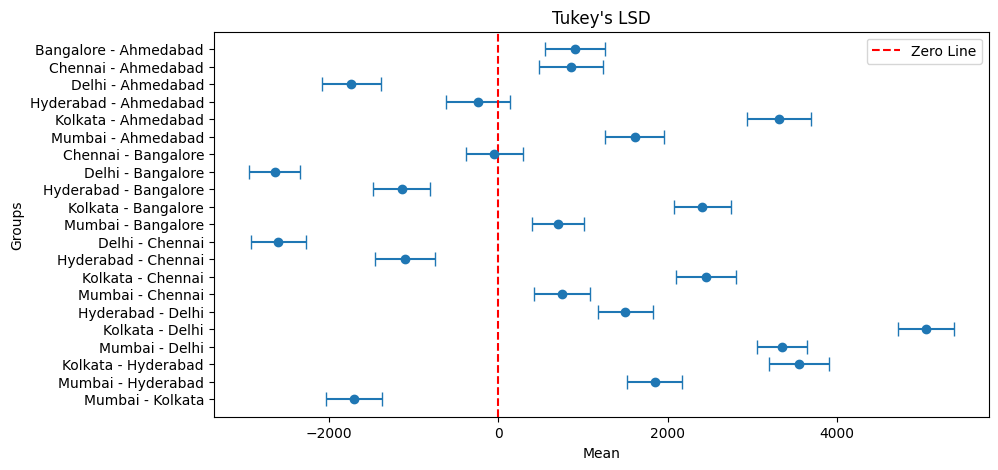

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Departure
statistic = 1139.8976291069482
pvalue = 0.0
df = (3.0, 452084.0)
df_num = 3.0
df_denom = 452084.0
nobs_t = 452088.0
n_groups = 4
means = [21814.19766096 23680.61268245 23769.46626136 16179.07335759]
nobs = [115774. 184980. 127969.  23365.]
vars_ = [3.86164456e+08 4.11552997e+08 4.55749242e+08 2.52078946e+08]
use_var = equal
welch_correction = True
tuple = (1139.8976291069482, 0.0)
Fisher's LSD


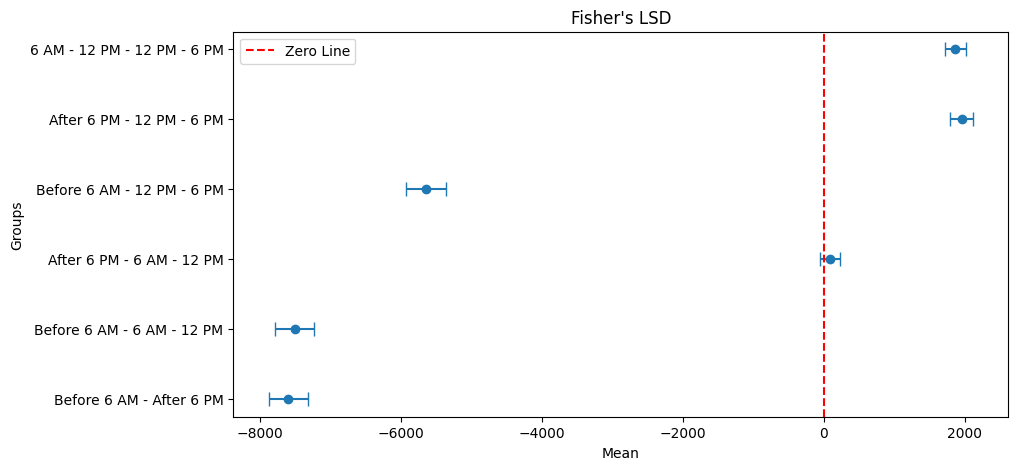

Bonferroni's LSD


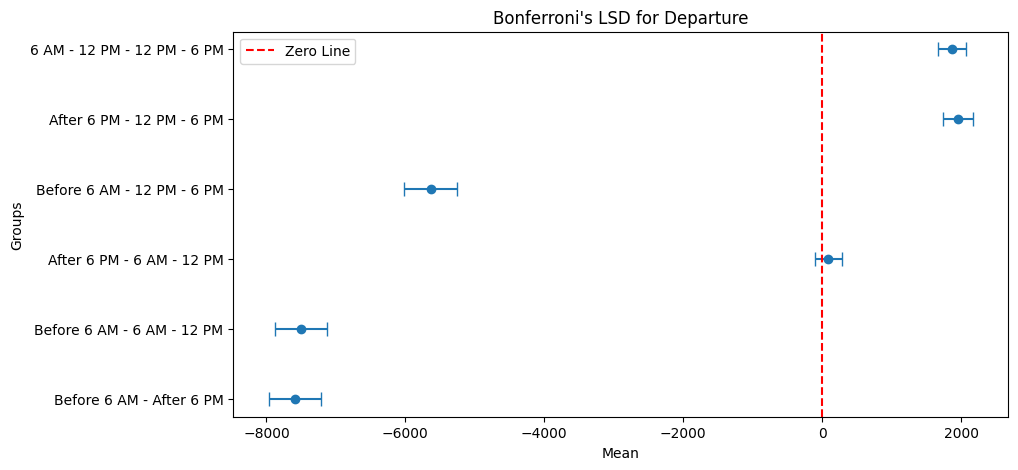

Tukey's LSD


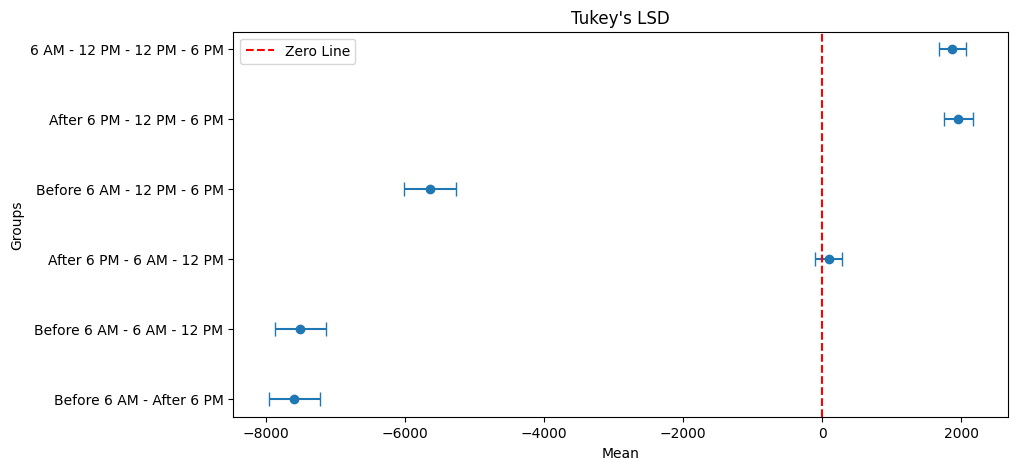

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Total_stops
statistic = 13615.061707103705
pvalue = 0.0
df = (2.0, 452085.0)
df_num = 2.0
df_denom = 452085.0
nobs_t = 452088.0
n_groups = 3
means = [25008.16811308 17783.26649936 10353.05230413]
nobs = [369650.  30683.  51755.]
vars_ = [4.48203865e+08 1.68115014e+08 9.69659525e+07]
use_var = equal
welch_correction = True
tuple = (13615.061707103705, 0.0)
Fisher's LSD


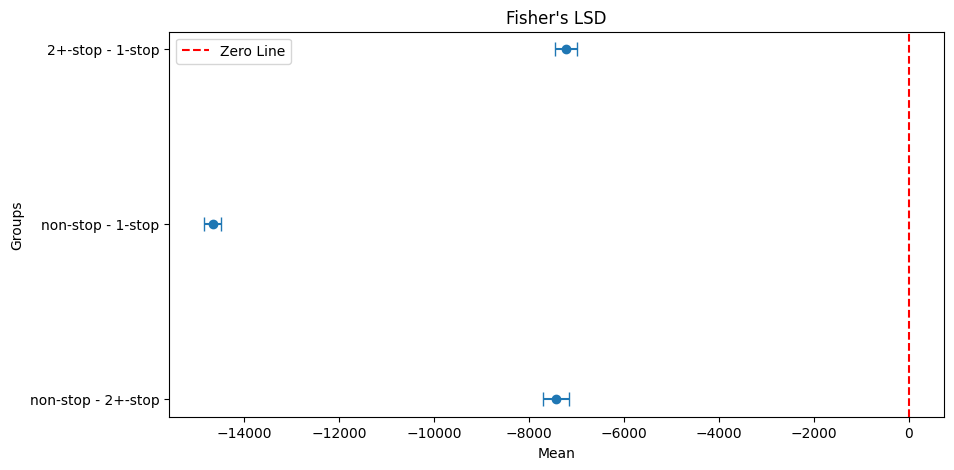

Bonferroni's LSD


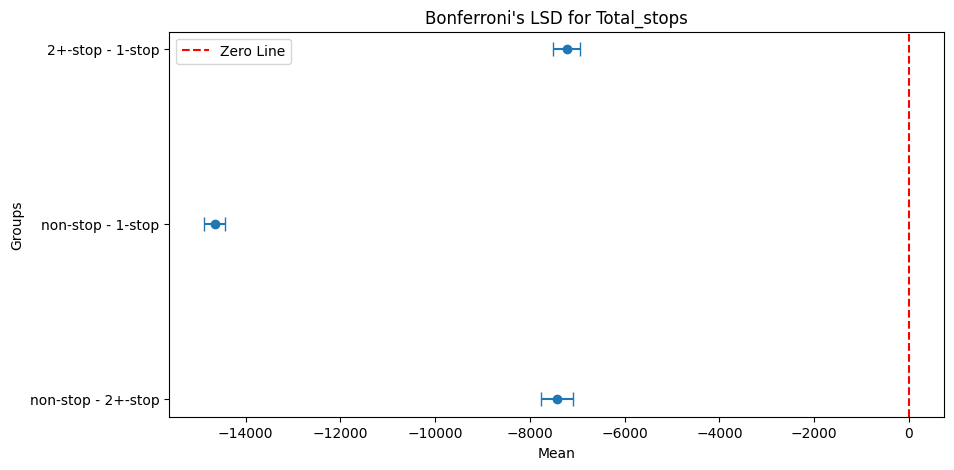

Tukey's LSD


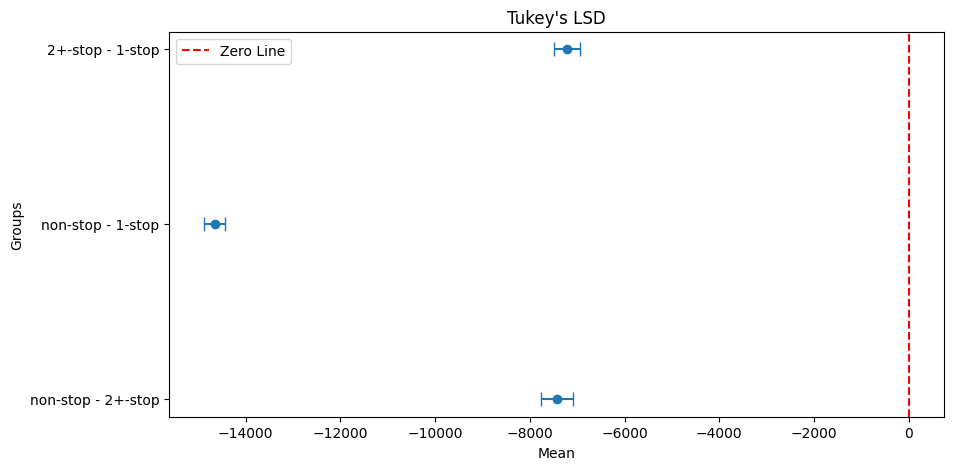

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Arrival
statistic = 1266.986409458906
pvalue = 0.0
df = (3.0, 452084.0)
df_num = 3.0
df_denom = 452084.0
nobs_t = 452088.0
n_groups = 4
means = [23059.59594924 21868.1226639  24211.36627286 16970.24479116]
nobs = [101413. 119644. 200266.  30765.]
vars_ = [4.27683568e+08 3.78911960e+08 4.38698796e+08 2.70764146e+08]
use_var = equal
welch_correction = True
tuple = (1266.986409458906, 0.0)
Fisher's LSD


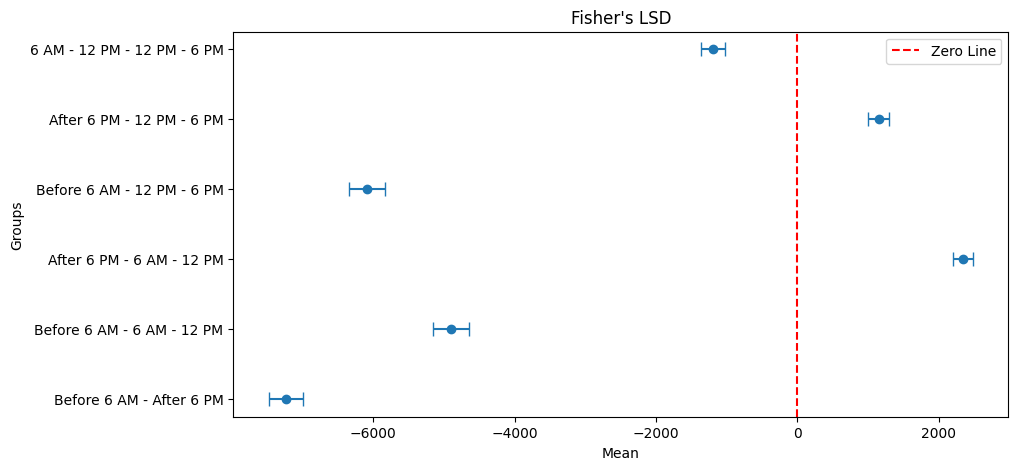

Bonferroni's LSD


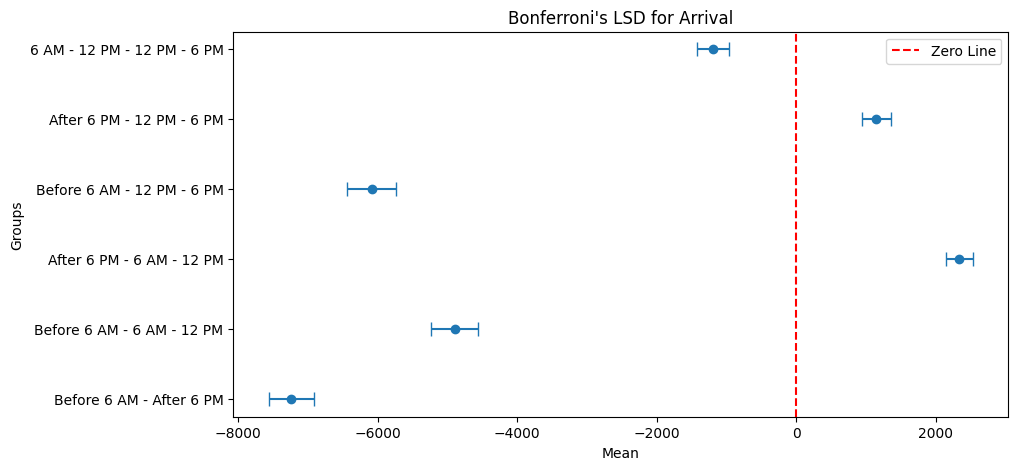

Tukey's LSD


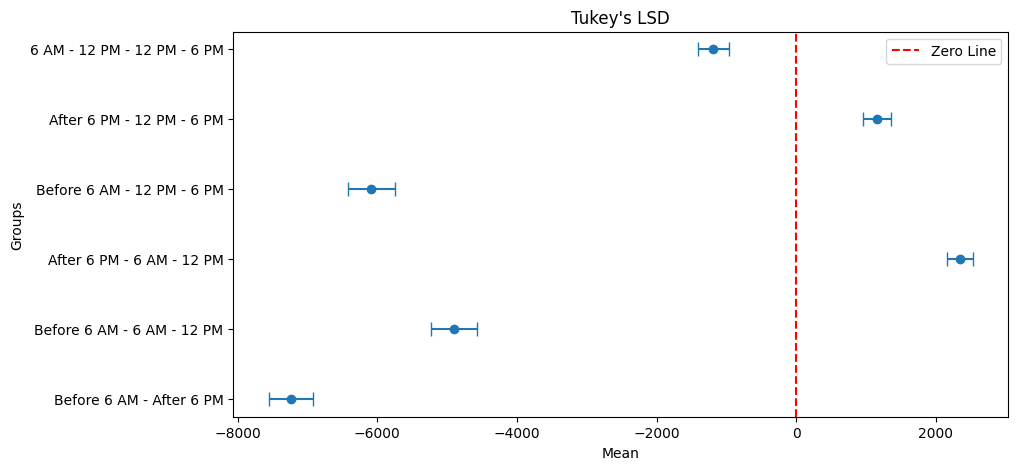

------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for Destination
statistic = 352.35559536047384
pvalue = 0.0
df = (6.0, 452081.0)
df_num = 6.0
df_denom = 452081.0
nobs_t = 452088.0
n_groups = 7
means = [21319.58949027 22806.2830366  23743.28441195 20999.39325178
     21912.67792897 25190.83857696 23937.77264895]
nobs = [44435. 72344. 57589. 77739. 62539. 54447. 82995.]
vars_ = [3.53680093e+08 4.58309488e+08 4.13518012e+08 3.39719233e+08
     3.87149191e+08 4.69516862e+08 4.42325283e+08]
use_var = equal
welch_correction = True
tuple = (352.35559536047384, 0.0)
Fisher's LSD


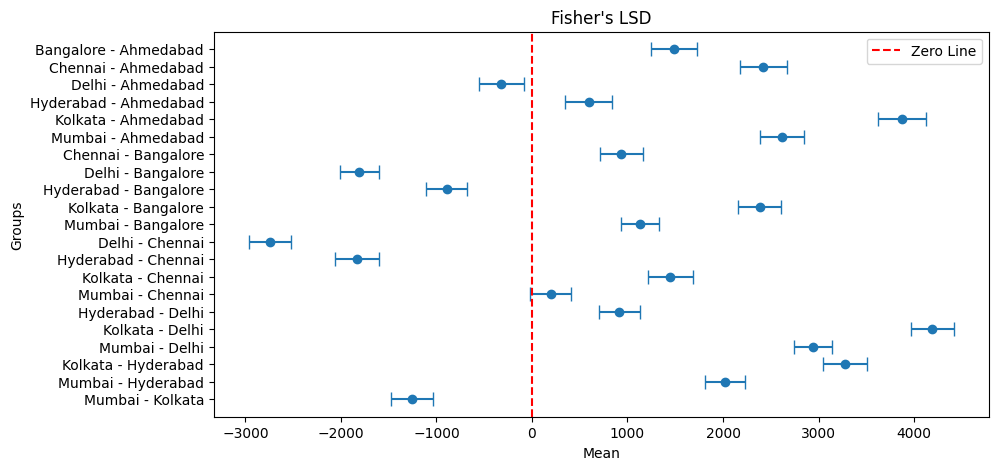

Bonferroni's LSD


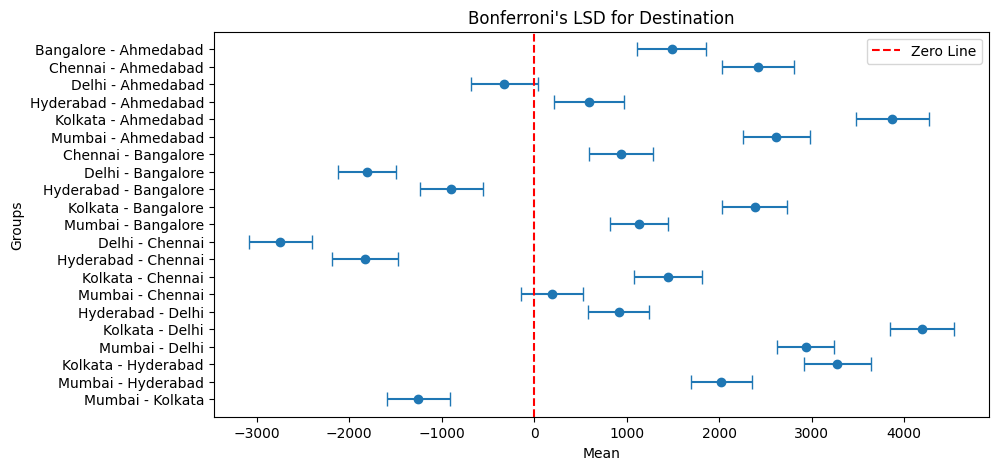

Tukey's LSD


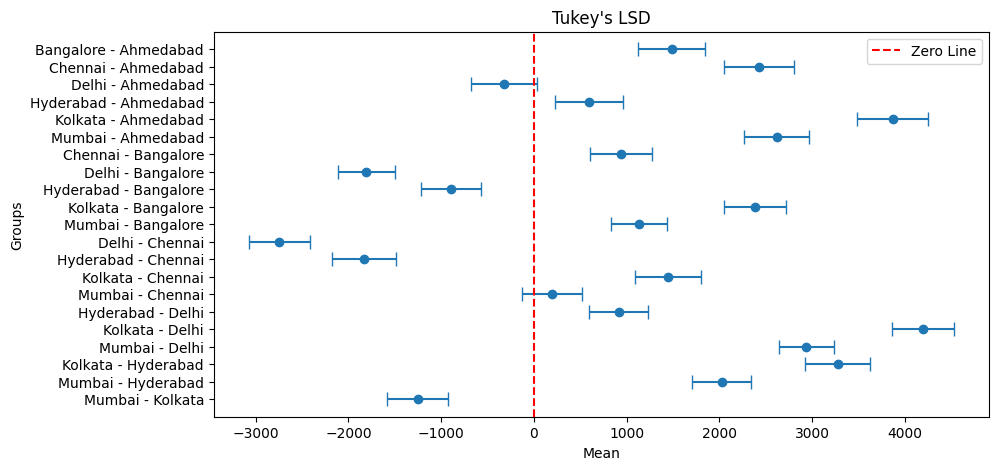

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
from statsmodels.stats.oneway import anova_oneway
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

cols_to_check = ['period', 'day_type', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']
alpha = 0.05
df_analysis.loc[:, 'period'] = df_analysis['period'].astype(str)

for col in cols_to_check:
  print(f"ANOVA test for {col}")
  result = anova_oneway(df_analysis['Fare'], groups=df_analysis[col], use_var='equal')
  print(result)

  vars = df_analysis[[col, 'Fare']].groupby(col).var().sort_index().to_numpy()
  print('Fisher\'s LSD')
  n = df_analysis[col].value_counts(sort = False).sort_index().to_numpy()
  t = abs(ss.t.ppf(alpha/2, result.df_denom))
  SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
  MSE = SSE/(result.df_denom)
  diffs = []
  labels = []
  LSDs = []
  means = df_analysis.groupby(col)['Fare'].mean().sort_index().values
  for i in range(result.n_groups):
    for j in range(i+1, result.n_groups):
      LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
      diff = means[j] - means[i]
      diffs.append(diff)
      labels.append('{} - {}'.format(df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[j], df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[i]))
  num_comp = int(result.n_groups*(result.n_groups -1)  /2)
  # Plotting
  plt.figure(figsize=(10,5))
  plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
  plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
  plt.yticks(list(range(1, num_comp + 1)), labels)
  plt.ylabel('Groups')
  plt.xlabel('Mean')
  plt.title('Fisher\'s LSD')
  plt.legend()
  # Flip the y-axis
  plt.gca().invert_yaxis()
  plt.show()


  print('Bonferroni\'s LSD')
  num_comp = int(result.n_groups*(result.n_groups -1)  /2)
  n = df_analysis[col].value_counts(sort = False).sort_index().to_numpy()
  t = abs(ss.t.ppf((alpha/num_comp)/2, result.df_denom))
  SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
  MSE = SSE/(result.df_denom)
  diffs = []
  labels = []
  LSDs = []
  means = df_analysis.groupby(col)['Fare'].mean().sort_index().values
  for i in range(result.n_groups):
    for j in range(i+1, result.n_groups):
      LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
      diff = means[j] - means[i]
      diffs.append(diff)
      labels.append('{} - {}'.format(df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[j], df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[i]))
  # Plotting
  plt.figure(figsize=(10,5))
  plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
  plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
  plt.yticks(list(range(1, num_comp + 1)), labels)
  plt.ylabel('Groups')
  plt.xlabel('Mean')
  plt.title(f'Bonferroni\'s LSD for {col}')
  plt.legend()
  # Flip the y-axis
  plt.gca().invert_yaxis()
  plt.show()


  print('Tukey\'s LSD')
  MultiComp = MultiComparison(df_analysis['Fare'].to_numpy(), groups=df_analysis[col].to_numpy())
  tukey = MultiComp.tukeyhsd()
  diffs = tukey.confint[:, 1] - tukey.meandiffs
  LSDs = np.abs(tukey.confint[:, 1] - tukey.meandiffs)
  labels = []
  for i in range(len(tukey.groupsunique)):
    for j in range(i +1, len(tukey.groupsunique)):
      labels.append(f'{tukey.groupsunique[j]} - {tukey.groupsunique[i]}')
  # Plotting
  plt.figure(figsize=(10,5))
  plt.errorbar(tukey.meandiffs, list(range(1, len(tukey.meandiffs) + 1)), xerr=(LSDs), fmt='o', capsize=5)
  plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
  plt.yticks(list(range(1, len(tukey.meandiffs) + 1)), labels)
  plt.ylabel('Groups')
  plt.xlabel('Mean')
  plt.title('Tukey\'s LSD')
  plt.legend()
  # Flip the y-axis
  plt.gca().invert_yaxis()
  plt.show()


  print("-"*150)


ANOVA test for period
statistic = 1183.8165718563046
pvalue = 0.0
df = (3.0, 452084.0)
df_num = 3.0
df_denom = 452084.0
nobs_t = 452088.0
n_groups = 4
means = [22277.86288643 21269.03218242 25394.32533657 20960.76903459]
nobs = [138316. 117269. 142391.  54112.]
vars_ = [4.07638443e+08 3.76417402e+08 4.59768536e+08 3.51181677e+08]
use_var = equal
welch_correction = True
tuple = (1183.8165718563046, 0.0)
------------------------------------------------------------------------------------------------------------------------------------------------------
ANOVA test for day_type
statistic = 14.874621107399372
pvalue = 0.00011491435725455698
df = (1.0, 452086.0)
df_num = 1.0
df_denom = 452086.0
nobs_t = 452088.0
n_groups = 2
means = [22768.22327523 23028.87771423]
nobs = [327421. 124667.]
vars_ = [4.16353446e+08 4.02019314e+08]
use_var = equal
welch_correction = True
tuple = (14.874621107399372, 0.00011491435725455698)
-------------------------------------------------------------------------

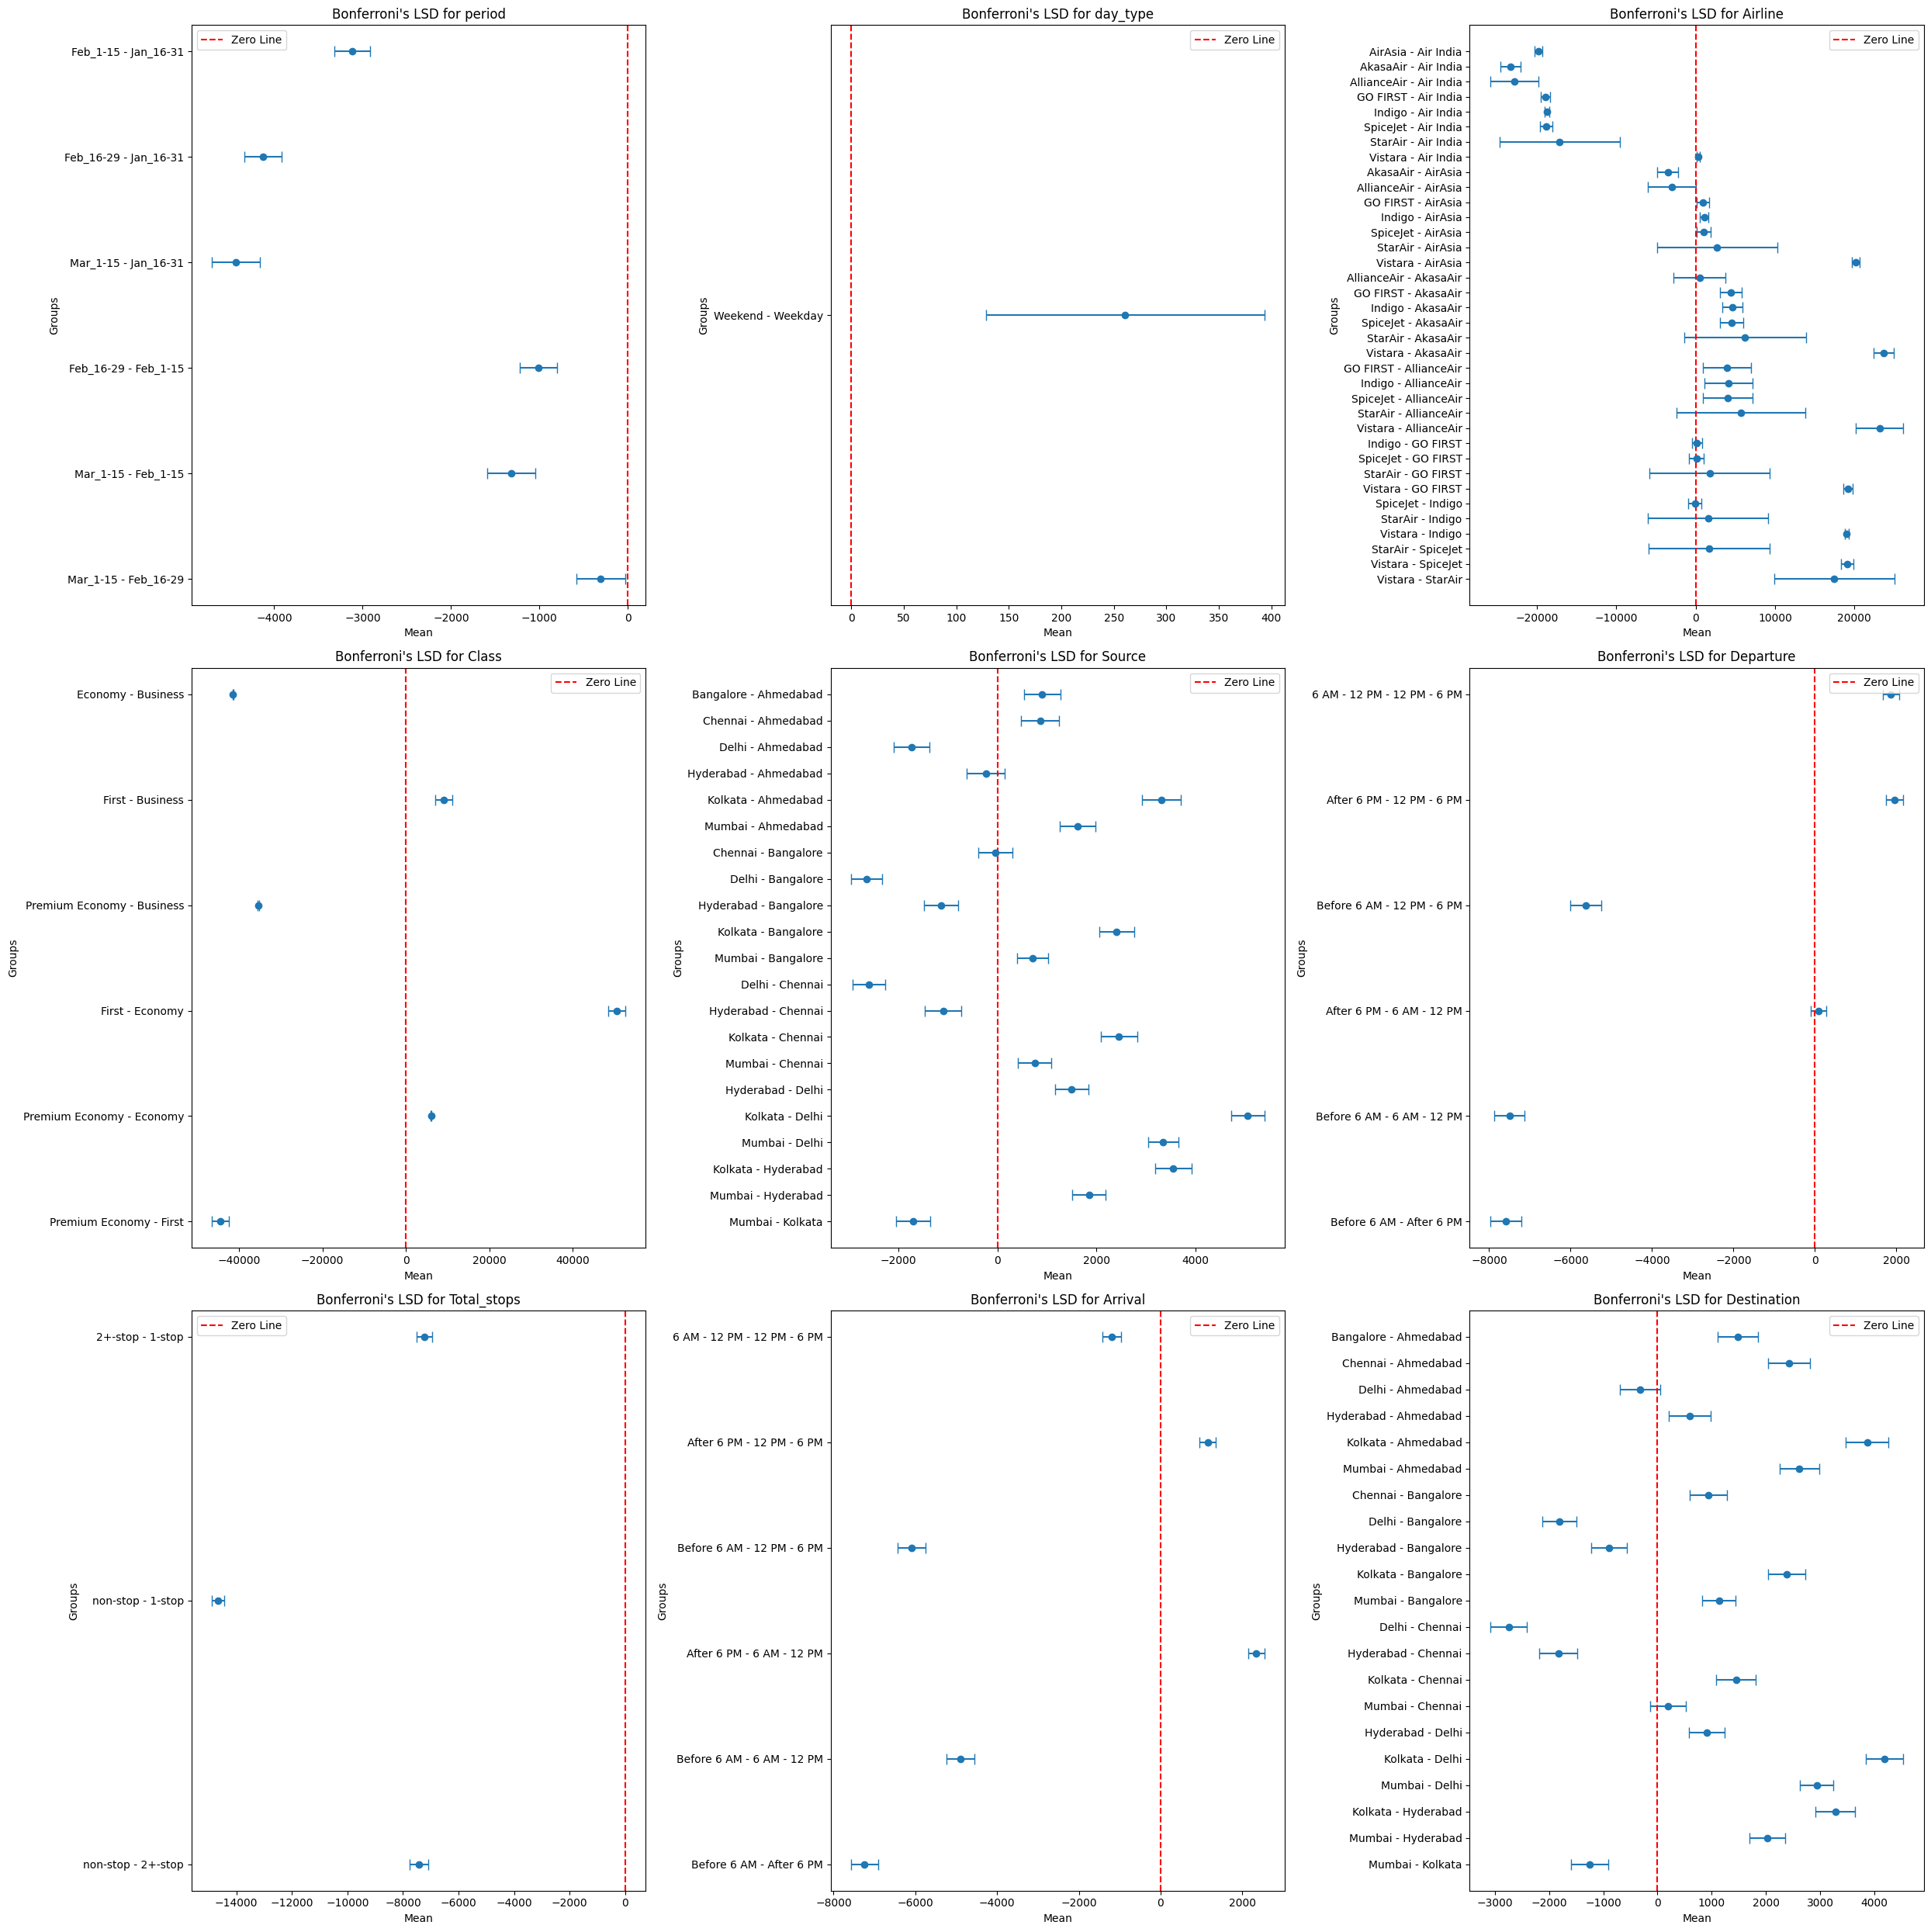

In [ ]:
from statsmodels.stats.oneway import anova_oneway
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

cols_to_check = ['period', 'day_type', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']
alpha = 0.05
df_analysis.loc[:, 'period'] = df_analysis['period'].astype(str)

num_cols = 3
num_rows = (len(cols_to_check) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig_width = 25
fig_height = fig_width * num_rows / num_cols  # Adjust height to maintain aspect ratio

fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

for idx, col in enumerate(cols_to_check):
    coll = col
    print(f"ANOVA test for {col}")
    result = anova_oneway(df_analysis['Fare'], groups=df_analysis[col], use_var='equal')
    print(result)

    vars = df_analysis[[col, 'Fare']].groupby(col).var().sort_index().to_numpy()
    # print('Bonferroni\'s LSD')
    num_comp = int(result.n_groups * (result.n_groups - 1) / 2)
    n = df_analysis[col].value_counts(sort=False).sort_index().to_numpy()
    t = abs(ss.t.ppf((alpha / num_comp) / 2, result.df_denom))
    SSE = sum([(n[i] - 1) * vars[i] for i in range(len(vars))])
    MSE = SSE / (result.df_denom)
    diffs = []
    labels = []
    LSDs = []
    means = df_analysis.groupby(col)['Fare'].mean().sort_index().values
    for i in range(result.n_groups):
        for j in range(i + 1, result.n_groups):
            LSDs.append((t * np.sqrt(MSE * (1 / n[i] + 1 / n[j])))[0])
            diff = means[j] - means[i]
            diffs.append(diff)
            labels.append('{} - {}'.format(df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[j],
                                           df_analysis.groupby(col)['Fare'].mean().sort_index().keys()[i]))

    # Plotting
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
    ax.axvline(x=0, color='red', linestyle='--', label='Zero Line')
    ax.set_yticks(list(range(1, num_comp + 1)))
    ax.set_yticklabels(labels)
    ax.set_ylabel('Groups')
    ax.set_xlabel('Mean')
    ax.set_title(f'Bonferroni\'s LSD for {coll}')
    ax.legend()
    # Flip the y-axis
    ax.invert_yaxis()

    print("-" * 150)

plt.tight_layout()
plt.show()


##  **Two Way**

### **Airline and class**

In [ ]:
# Two-way ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

model = ols(formula='Fare ~ C(Class) + C(Airline) + C(Class):C(Airline)', data=df_analysis).fit()
result = sm.stats.anova_lm(model, typ=2)
result

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 9
  warnings.warn('covariance of constraints does not have full '


sum_sq        df             F  PR(>F)
C(Class)             2.468682e+14       3.0  1.078086e+06     0.0
C(Airline)           1.317467e+01       8.0  2.157542e-08     1.0
C(Class):C(Airline)  1.605413e+14      24.0  8.763652e+04     0.0
Residual             3.450650e+13  452075.0           NaN     NaN

In [ ]:
result = 2.468682e+14 + 1.317467e+01 + 1.605413e+14 + 3.450650e+13
print("{:.2e}".format(result))

4.42e+14


In [ ]:
df_tukey = df_analysis[['Airline', 'Class', 'Fare']].copy()

df_tukey['Class * Airline'] = df_tukey['Class'].astype(str) + " " + df_tukey['Airline'].astype(str)

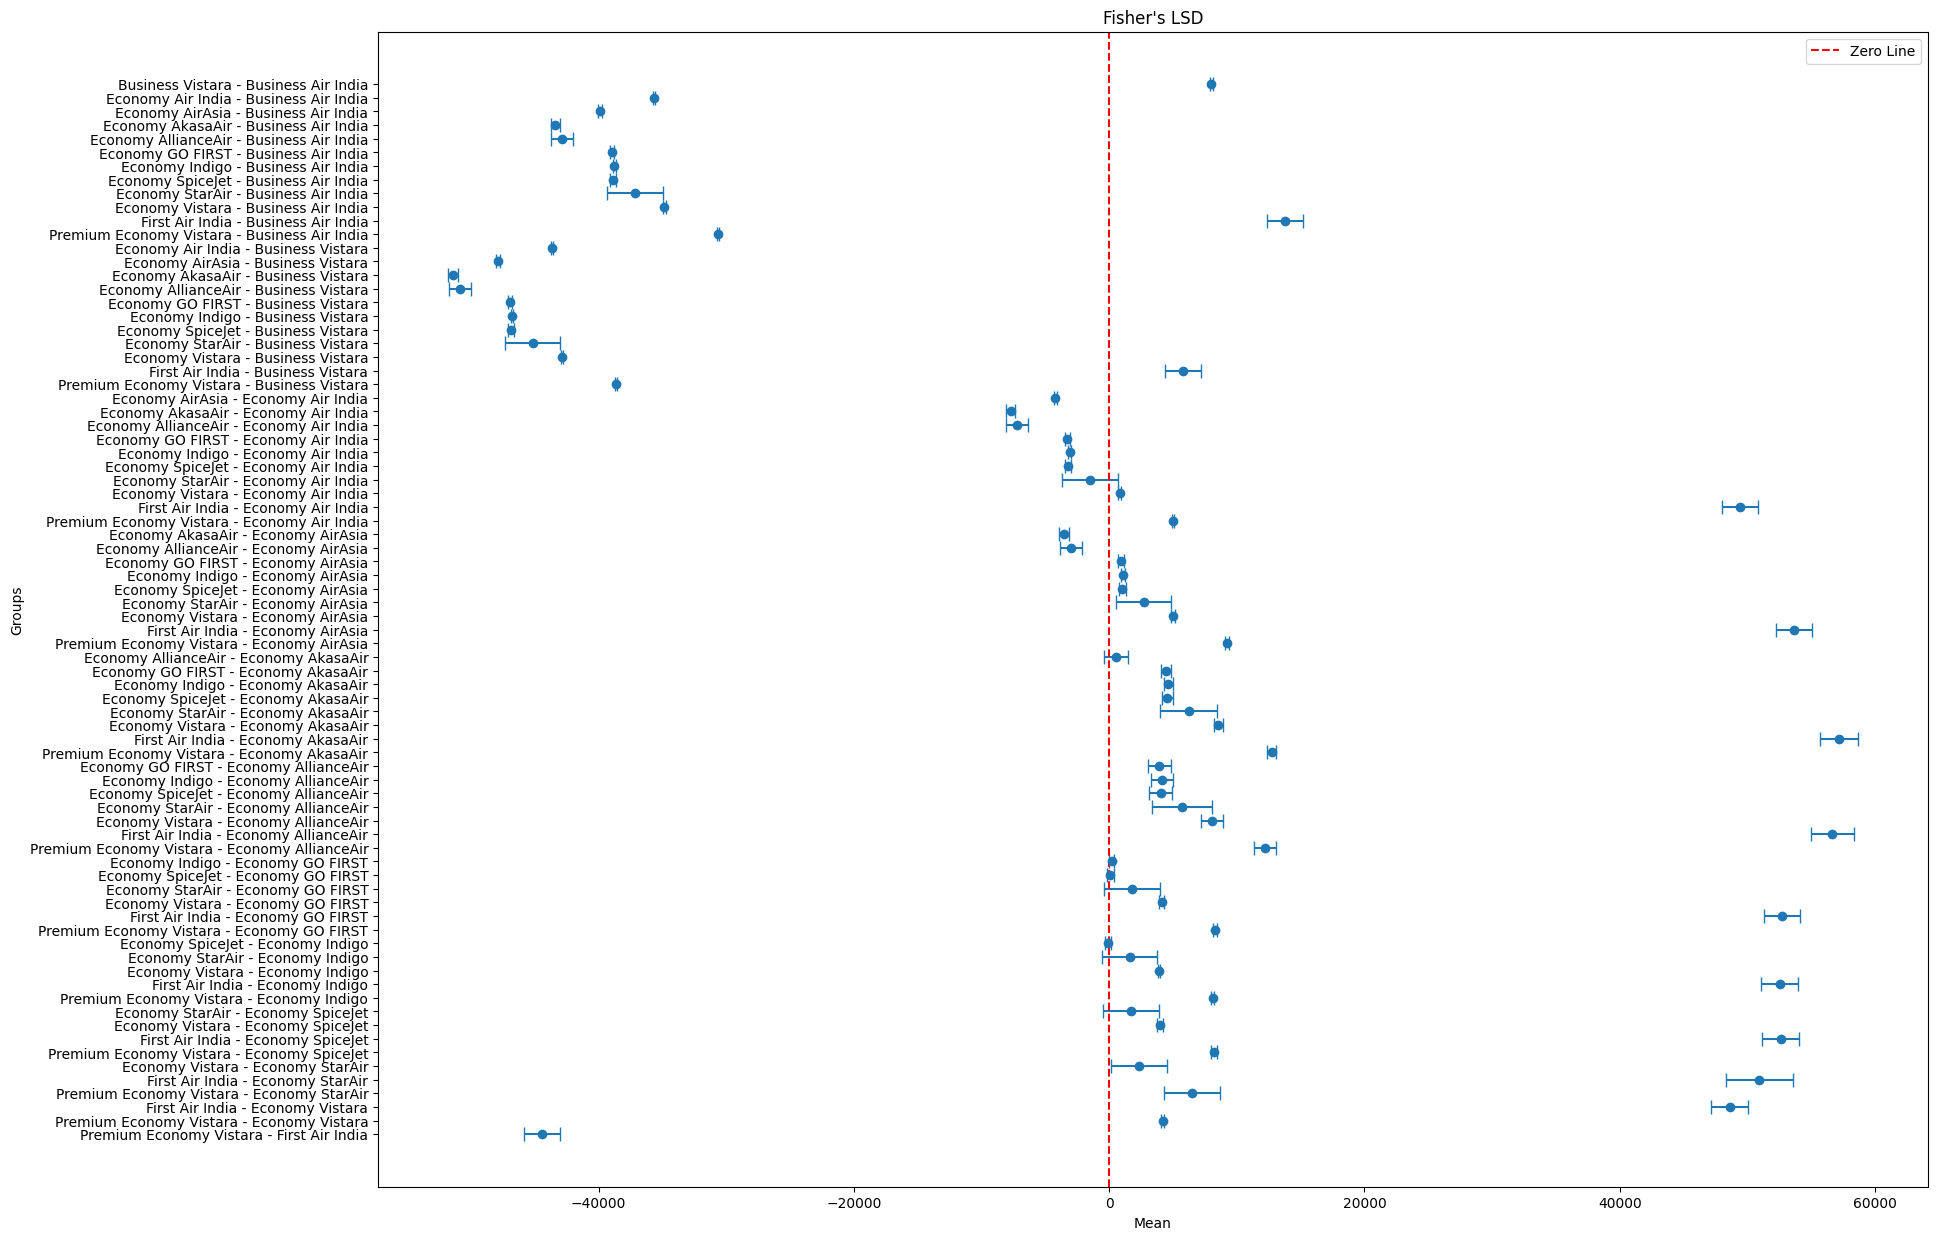

In [ ]:
# Fisher's
alpha = 0.05
df_denom = 452075
n_groups = df_tukey['Class * Airline'].nunique()
vars = df_tukey[['Class * Airline', 'Fare']].groupby('Class * Airline').var().sort_index().to_numpy()
n = df_tukey['Class * Airline'].value_counts(sort = False).sort_index().to_numpy()
t = abs(ss.t.ppf(alpha/2, df_denom))
SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
MSE = SSE/(df_denom)
diffs = []
labels = []
LSDs = []
means = df_tukey[['Class * Airline', 'Fare']].groupby('Class * Airline').mean().sort_index().to_numpy()
for i in range(n_groups):
  for j in range(i+1, n_groups):
    LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
    diff = means[j] - means[i]
    diffs.append((diff[0]))
    labels.append('{} - {}'.format(df_tukey.groupby('Class * Airline')['Fare'].mean().sort_index().keys()[j], df_tukey.groupby('Class * Airline')['Fare'].mean().sort_index().keys()[i]))
num_comp = int(n_groups*(n_groups -1) /2)
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, num_comp + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Fisher\'s LSD')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

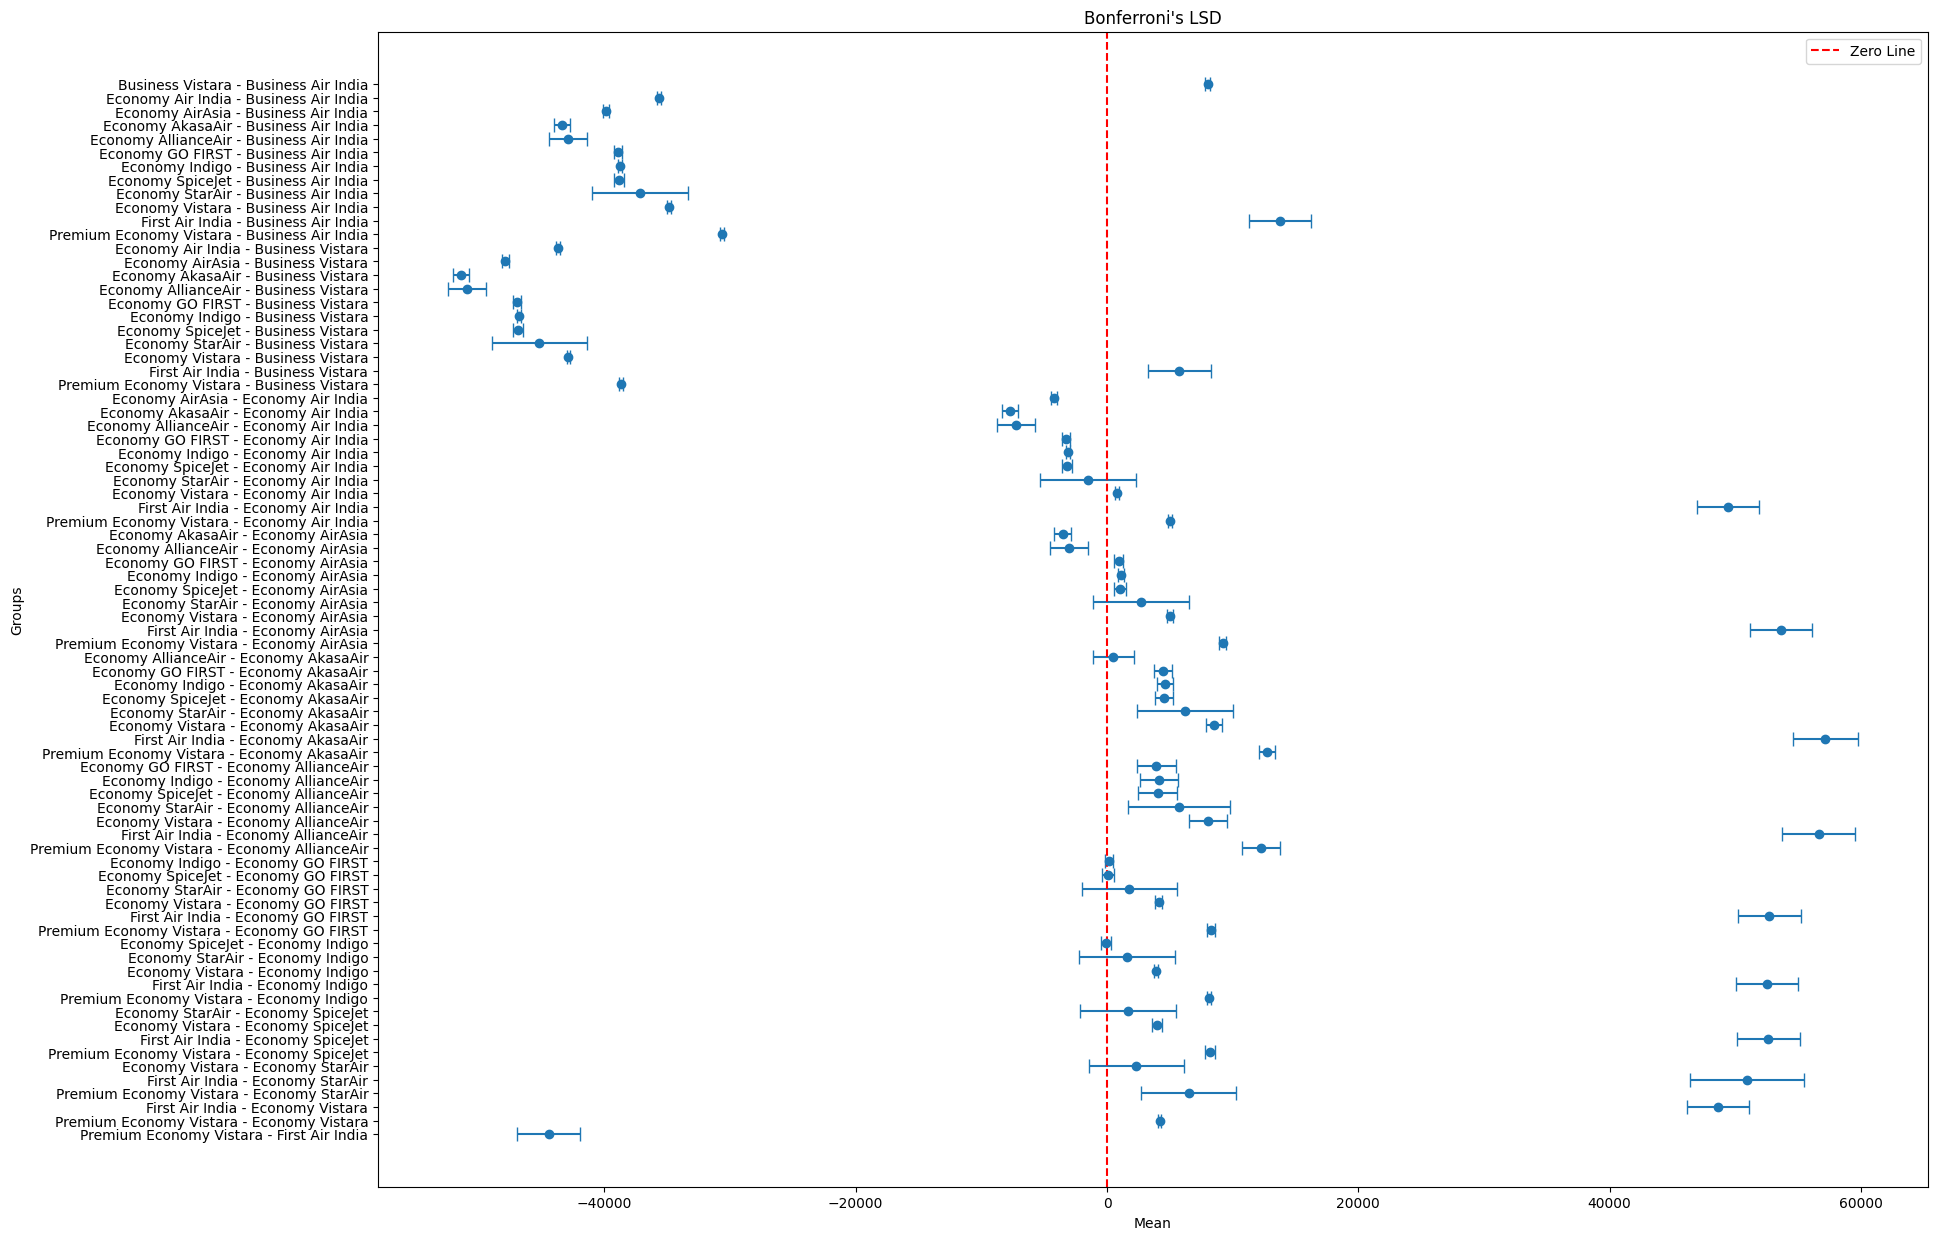

In [ ]:
# Bonferroni's
alpha = 0.05
df_denom = 452075
n_groups = df_tukey['Class * Airline'].nunique()
num_comp = int(n_groups*(n_groups -1) /2)
vars = df_tukey[['Class * Airline', 'Fare']].groupby('Class * Airline').var().sort_index().to_numpy()
n = df_tukey['Class * Airline'].value_counts(sort = False).sort_index().to_numpy()
t = abs(ss.t.ppf((alpha/num_comp)/2, df_denom))
SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
MSE = SSE/(df_denom)
diffs = []
labels = []
LSDs = []
means = df_tukey[['Class * Airline', 'Fare']].groupby('Class * Airline').mean().sort_index().to_numpy()
for i in range(n_groups):
  for j in range(i+1, n_groups):
    LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
    diff = means[j] - means[i]
    diffs.append((diff[0]))
    labels.append('{} - {}'.format(df_tukey.groupby('Class * Airline')['Fare'].mean().sort_index().keys()[j], df_tukey.groupby('Class * Airline')['Fare'].mean().sort_index().keys()[i]))
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, num_comp + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Bonferroni\'s LSD')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

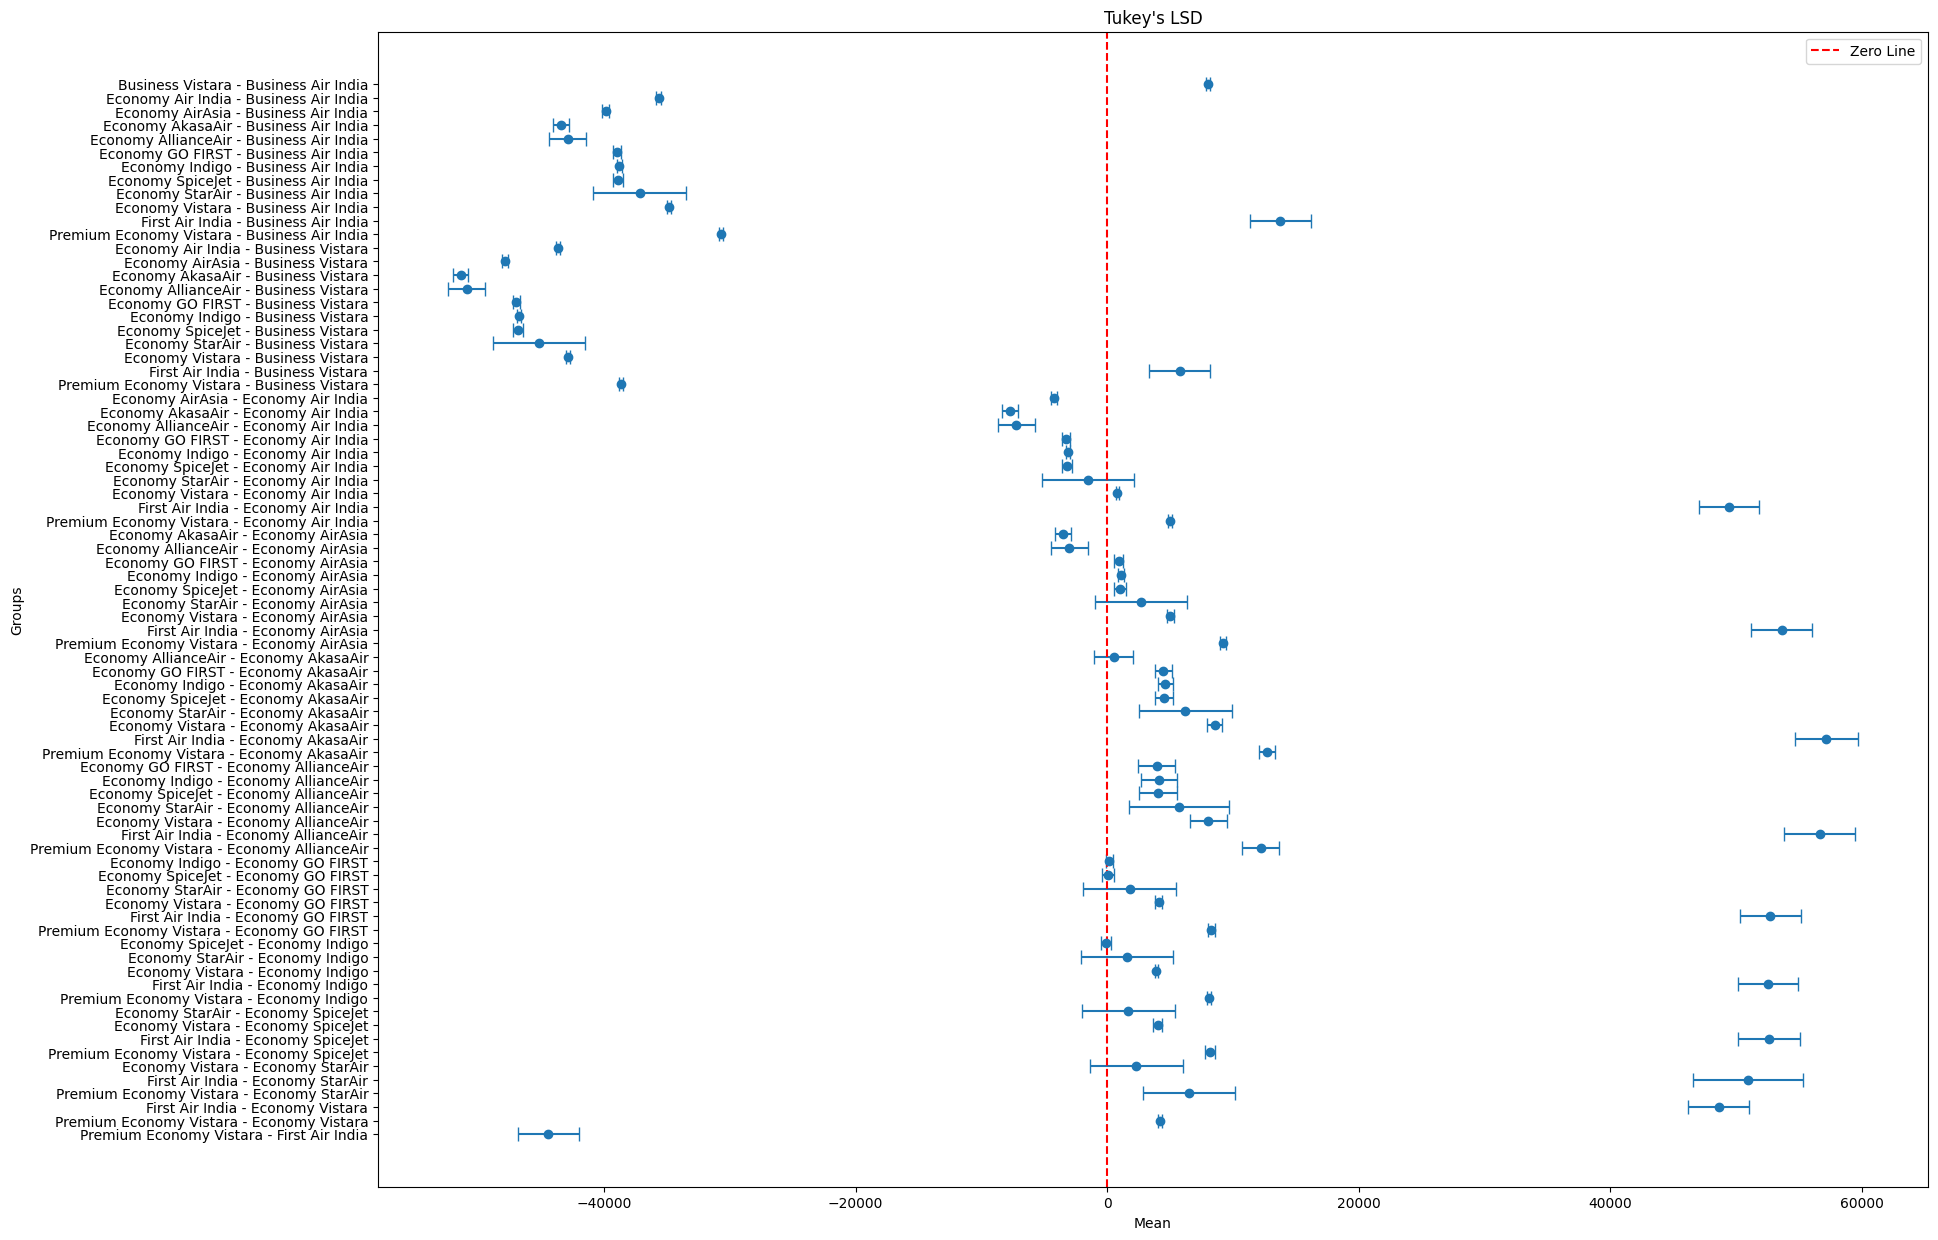

In [ ]:
# Tukeys
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey_interaction = pairwise_tukeyhsd(df_analysis['Fare'], df_analysis['Class'] + df_analysis['Airline'])
tukey_interaction = pairwise_tukeyhsd(df_tukey['Fare'], df_tukey['Class * Airline'])

diffs = tukey_interaction.confint[:, 1] - tukey_interaction.meandiffs
LSDs = np.abs(tukey_interaction.confint[:, 1] - tukey_interaction.meandiffs)
labels = []
for i in range(len(tukey_interaction.groupsunique)):
  for j in range(i +1, len(tukey_interaction.groupsunique)):
    labels.append(f'{tukey_interaction.groupsunique[j]} - {tukey_interaction.groupsunique[i]}')
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(tukey_interaction.meandiffs, list(range(1, len(tukey_interaction.meandiffs) + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, len(tukey_interaction.meandiffs) + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Tukey\'s LSD')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

### **Class and day_type**

In [ ]:
# Two-way ANOVA
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

model = ols(formula='Fare ~ C(Class) + C(day_type) + C(Class):C(day_type)', data=df_analysis).fit()
result = sm.stats.anova_lm(model, typ=2)
result

sum_sq        df              F        PR(>F)
C(Class)              1.489692e+14       3.0  599430.750669  0.000000e+00
C(day_type)           1.051070e+09       1.0      12.688071  3.680335e-04
C(Class):C(day_type)  2.142793e+10       3.0      86.222926  9.051273e-56
Residual              3.744997e+13  452080.0            NaN           NaN

In [ ]:
"{}".format(result['df'].sum())

'452087.0'

In [ ]:
df_tukey = df_analysis[['day_type', 'Class', 'Fare']].copy()

df_tukey['Class * day_type'] = df_tukey['Class'].astype(str) + " " + df_tukey['day_type'].astype(str)

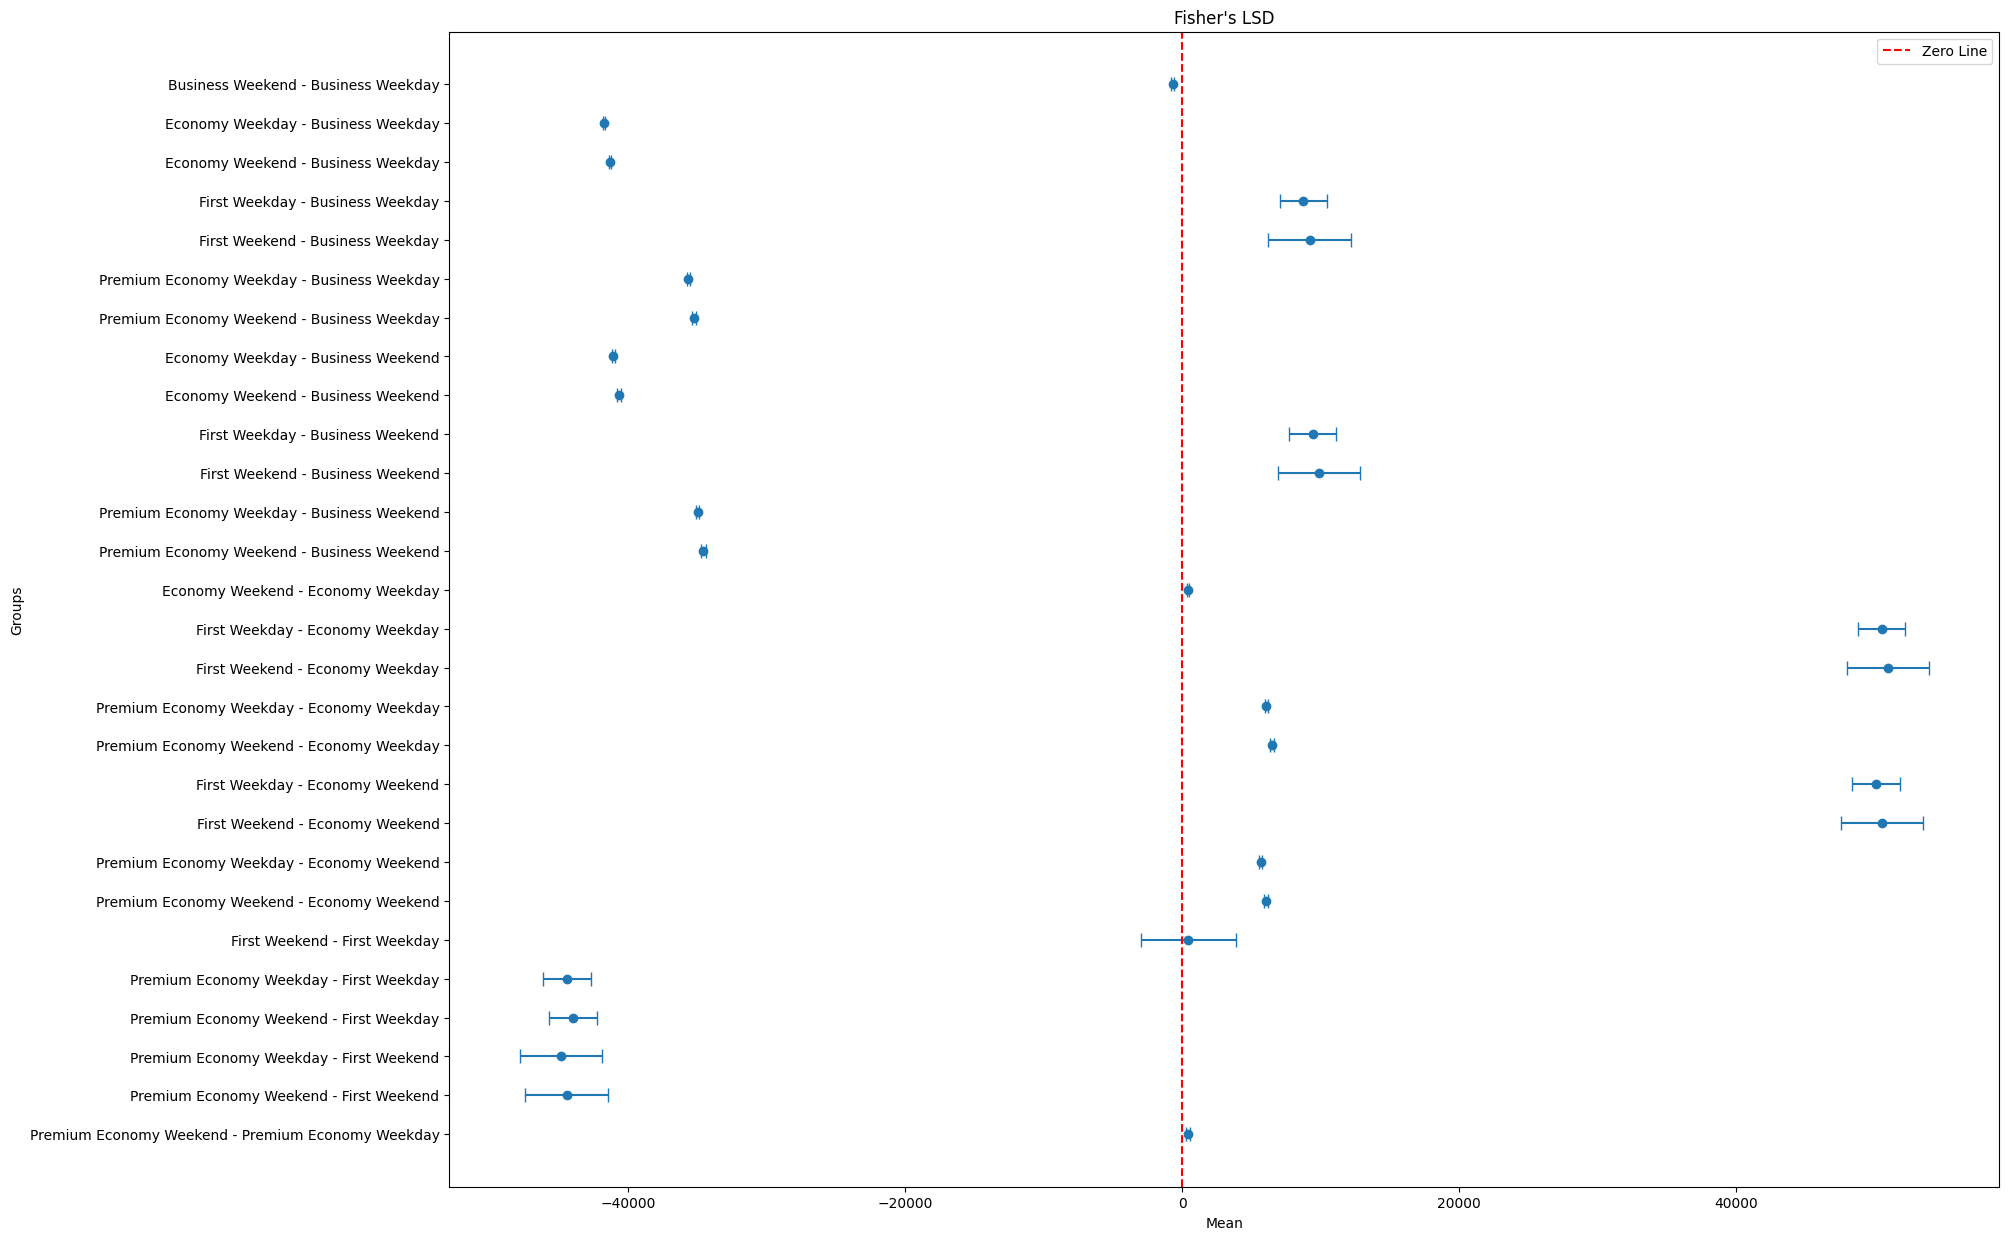

In [ ]:
# Fisher's
alpha = 0.05
df_denom = 452080
n_groups = df_tukey['Class * day_type'].nunique()
vars = df_tukey[['Class * day_type', 'Fare']].groupby('Class * day_type').var().sort_index().to_numpy()
n = df_tukey['Class * day_type'].value_counts(sort = False).sort_index().to_numpy()
t = abs(ss.t.ppf(alpha/2, df_denom))
SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
MSE = SSE/(df_denom)
diffs = []
labels = []
LSDs = []
means = df_tukey[['Class * day_type', 'Fare']].groupby('Class * day_type').mean().sort_index().to_numpy()
for i in range(n_groups):
  for j in range(i+1, n_groups):
    LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
    diff = means[j] - means[i]
    diffs.append((diff[0]))
    labels.append('{} - {}'.format(df_tukey.groupby('Class * day_type')['Fare'].mean().sort_index().keys()[j], df_tukey.groupby('Class * day_type')['Fare'].mean().sort_index().keys()[i]))
num_comp = int(n_groups*(n_groups -1) /2)
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, num_comp + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Fisher\'s LSD')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Bonferroni's
alpha = 0.05
df_denom = 452080
n_groups = df_tukey['Class * day_type'].nunique()
vars = df_tukey[['Class * day_type', 'Fare']].groupby('Class * day_type').var().sort_index().to_numpy()
n = df_tukey['Class * day_type'].value_counts(sort = False).sort_index().to_numpy()
t = abs(ss.t.ppf((alpha/num_comp)/2, df_denom))
SSE = sum([(n[i]-1)*vars[i] for i in range(len(vars))])
MSE = SSE/(df_denom)
diffs = []
labels = []
LSDs = []
means = df_tukey[['Class * day_type', 'Fare']].groupby('Class * day_type').mean().sort_index().to_numpy()
for i in range(n_groups):
  for j in range(i+1, n_groups):
    LSDs.append((t*np.sqrt(MSE*(1/n[i] + 1/n[j])))[0])
    diff = means[j] - means[i]
    diffs.append((diff[0]))
    labels.append('{} - {}'.format(df_tukey.groupby('Class * day_type')['Fare'].mean().sort_index().keys()[j], df_tukey.groupby('Class * day_type')['Fare'].mean().sort_index().keys()[i]))
num_comp = int(n_groups*(n_groups -1) /2)
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(diffs, list(range(1, num_comp + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, num_comp + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Bonferroni\'s LSD for Interaction')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

NameError: name 'df_tukey' is not defined

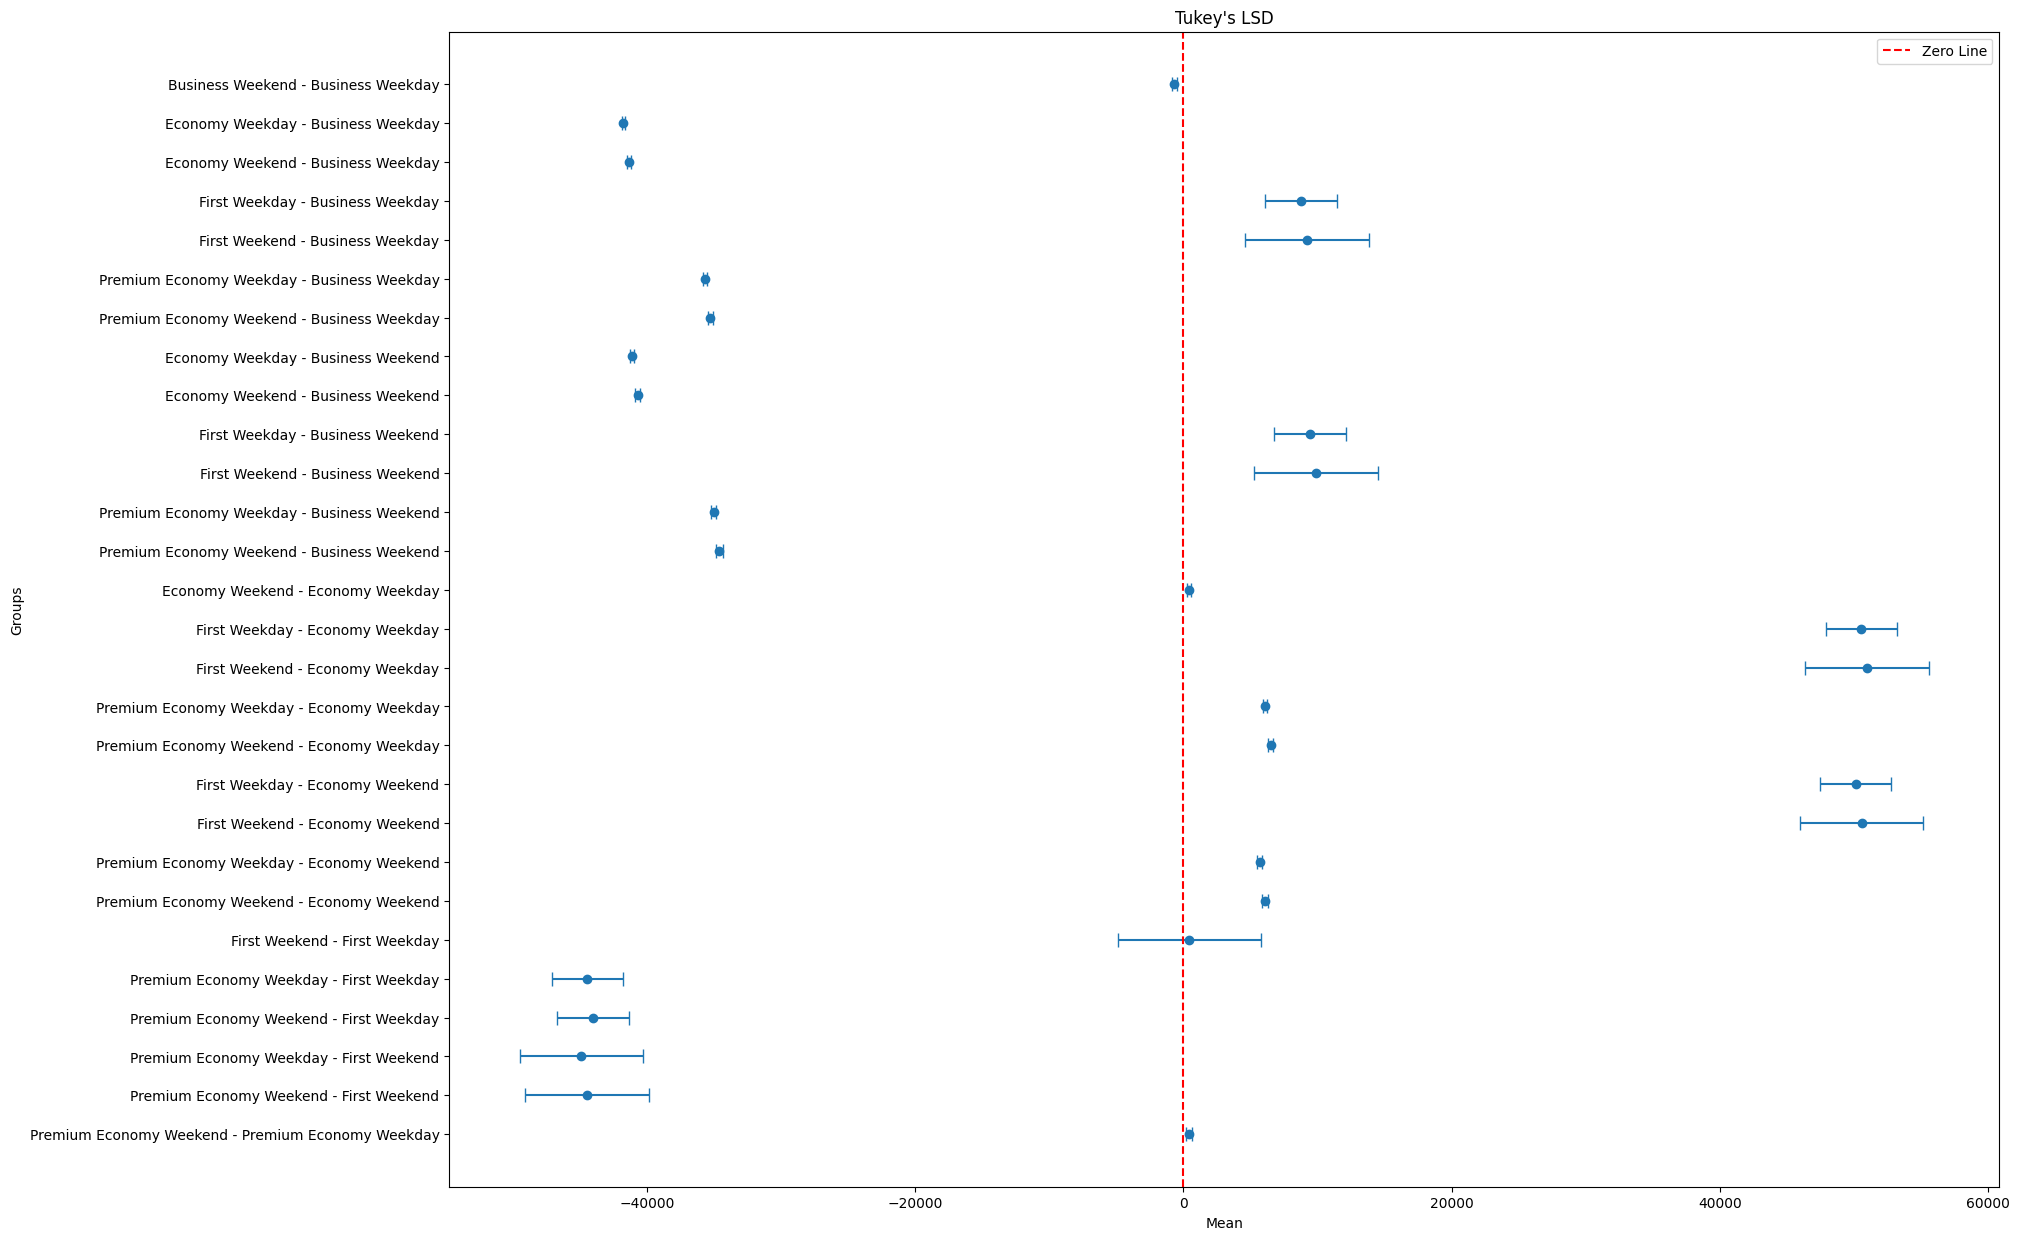

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey_interaction = pairwise_tukeyhsd(df_analysis['Fare'], df_analysis['Class'] + df_analysis['Airline'])
tukey_interaction = pairwise_tukeyhsd(df_tukey['Fare'], df_tukey['Class * day_type'])

diffs = tukey_interaction.confint[:, 1] - tukey_interaction.meandiffs
LSDs = np.abs(tukey_interaction.confint[:, 1] - tukey_interaction.meandiffs)
labels = []
for i in range(len(tukey_interaction.groupsunique)):
  for j in range(i +1, len(tukey_interaction.groupsunique)):
    labels.append(f'{tukey_interaction.groupsunique[j]} - {tukey_interaction.groupsunique[i]}')
# Plotting
plt.figure(figsize=(20,15))
plt.errorbar(tukey_interaction.meandiffs, list(range(1, len(tukey_interaction.meandiffs) + 1)), xerr=(LSDs), fmt='o', capsize=5)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
plt.yticks(list(range(1, len(tukey_interaction.meandiffs) + 1)), labels)
plt.ylabel('Groups')
plt.xlabel('Mean')
plt.title('Tukey\'s LSD')
plt.legend()
# Flip the y-axis
plt.gca().invert_yaxis()
plt.show()

# **One hot encoding**

In [ ]:
cat_cols = ['period', 'day_type', 'Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']
df_encoded = pd.get_dummies(df_analysis, columns=cat_cols, drop_first=False)
columns_to_exclude = ['Duration_in_hours', 'Days_left', 'Fare']
selected_columns = df_encoded.columns.difference(columns_to_exclude)
df_encoded[selected_columns] = df_encoded[selected_columns].astype(int)
df_encoded.head()

Duration_in_hours  Days_left  Fare  period_Jan_16-31  period_Feb_1-15  \
0             2.0833          1  5335                 1                0   
1             2.3333          1  5899                 1                0   
2             2.1667          1  5801                 1                0   
3             2.0833          1  5794                 1                0   
4             2.1667          1  5955                 1                0   

   period_Feb_16-29  period_Mar_1-15  day_type_Weekday  day_type_Weekend  \
0                 0                0                 1                 0   
1                 0                0                 1                 0   
2                 0                0                 1                 0   
3                 0                0                 1                 0   
4                 0                0                 1                 0   

   Airline_Air India  ...  Arrival_6 AM - 12 PM  Arrival_After 6 PM  \
0                  0  ...                     0                   1   
1                  0  ...                     0                   0   
2                  0  ...                     0                   0   
3                  0  ...                     0                   1   
4                  1  ...                     0                   1   

   Arrival_Before 6 AM  Destination_Ahmedabad  Destination_Bangalore  \
0                    0                      0                      0   
1                    1                      0                      0   
2                    1                      0                      0   
3                    0                      0                      0   
4                    0                      0                      0   

   Destination_Chennai  Destination_Delhi  Destination_Hyderabad  \
0                    0                  0                      0   
1                    0                  0                      0   
2                    0                  0                      0   
3                    0                  0                      0   
4                    0                  0                      0   

   Destination_Kolkata  Destination_Mumbai  
0                    0                   1  
1                    0                   1  
2                    0                   1  
3                    0                   1  
4                    0                   1  

[5 rows x 47 columns]

# **Clustering Analysis**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_cluster is your DataFrame containing the columns to be scaled

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define columns to be scaled
columns_to_scale = ['Duration_in_hours', 'Days_left', 'Fare']

# Fit the scaler on the specified columns
scaler.fit(df_encoded[columns_to_scale])

# Transform the specified columns
df_cluster = df_encoded.copy()
df_cluster[columns_to_scale] = scaler.transform(df_encoded[columns_to_scale])

# Now df_cluster_scaled contains the scaled columns

In [ ]:
df_cluster.describe()

Duration_in_hours      Days_left           Fare  period_Jan_16-31  \
count      452088.000000  452088.000000  452088.000000     452088.000000   
mean            0.270799       0.502610       0.151950          0.314963   
std             0.173498       0.291854       0.143304          0.464502   
min             0.000000       0.000000       0.000000          0.000000   
25%             0.136186       0.244898       0.052612          0.000000   
50%             0.247081       0.510204       0.085384          0.000000   
75%             0.367705       0.755102       0.241899          1.000000   
max             1.000000       1.000000       1.000000          1.000000   

       period_Feb_1-15  period_Feb_16-29  period_Mar_1-15  day_type_Weekday  \
count    452088.000000     452088.000000    452088.000000     452088.000000   
mean          0.305949          0.259394         0.119694          0.724242   
std           0.460809          0.438303         0.324603          0.446896   
min           0.000000          0.000000         0.000000          0.000000   
25%           0.000000          0.000000         0.000000          0.000000   
50%           0.000000          0.000000         0.000000          1.000000   
75%           1.000000          1.000000         0.000000          1.000000   
max           1.000000          1.000000         1.000000          1.000000   

       day_type_Weekend  Airline_Air India  ...  Arrival_6 AM - 12 PM  \
count     452088.000000      452088.000000  ...         452088.000000   
mean           0.275758           0.265083  ...              0.264648   
std            0.446896           0.441378  ...              0.441146   
min            0.000000           0.000000  ...              0.000000   
25%            0.000000           0.000000  ...              0.000000   
50%            0.000000           0.000000  ...              0.000000   
75%            1.000000           1.000000  ...              1.000000   
max            1.000000           1.000000  ...              1.000000   

       Arrival_After 6 PM  Arrival_Before 6 AM  Destination_Ahmedabad  \
count       452088.000000        452088.000000          452088.000000   
mean             0.442980             0.068051               0.098288   
std              0.496739             0.251834               0.297705   
min              0.000000             0.000000               0.000000   
25%              0.000000             0.000000               0.000000   
50%              0.000000             0.000000               0.000000   
75%              1.000000             0.000000               0.000000   
max              1.000000             1.000000               1.000000   

       Destination_Bangalore  Destination_Chennai  Destination_Delhi  \
count          452088.000000        452088.000000      452088.000000   
mean                0.160022             0.127384           0.171955   
std                 0.366627             0.333404           0.377342   
min                 0.000000             0.000000           0.000000   
25%                 0.000000             0.000000           0.000000   
50%                 0.000000             0.000000           0.000000   
75%                 0.000000             0.000000           0.000000   
max                 1.000000             1.000000           1.000000   

       Destination_Hyderabad  Destination_Kolkata  Destination_Mumbai  
count          452088.000000        452088.000000       452088.000000  
mean                0.138334             0.120435            0.183582  
std                 0.345250             0.325469            0.387143  
min                 0.000000             0.000000            0.000000  
25%                 0.000000             0.000000            0.000000  
50%                 0.000000             0.000000            0.000000  
75%                 0.000000             0.000000            0.000000  
max                 1.000000             1.000000            1.000000

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

X = df_cluster

kmeans = KMeans(n_clusters=2, random_state=88000, n_init="auto").fit(X)

In [ ]:
labels = kmeans.labels_

In [ ]:
df_cluster['Cluster_class'] = pd.Series(labels)

df_cluster.head()

Duration_in_hours  Days_left      Fare  period_Jan_16-31  period_Feb_1-15  \
0           0.031128        0.0  0.028424                 1                0   
1           0.036964        0.0  0.032404                 1                0   
2           0.033075        0.0  0.031712                 1                0   
3           0.031128        0.0  0.031663                 1                0   
4           0.033075        0.0  0.032799                 1                0   

   period_Feb_16-29  period_Mar_1-15  day_type_Weekday  day_type_Weekend  \
0                 0                0                 1                 0   
1                 0                0                 1                 0   
2                 0                0                 1                 0   
3                 0                0                 1                 0   
4                 0                0                 1                 0   

   Airline_Air India  ...  Arrival_After 6 PM  Arrival_Before 6 AM  \
0                  0  ...                   1                    0   
1                  0  ...                   0                    1   
2                  0  ...                   0                    1   
3                  0  ...                   1                    0   
4                  1  ...                   1                    0   

   Destination_Ahmedabad  Destination_Bangalore  Destination_Chennai  \
0                      0                      0                    0   
1                      0                      0                    0   
2                      0                      0                    0   
3                      0                      0                    0   
4                      0                      0                    0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_Mumbai  Cluster_class  
0                   1              0  
1                   1              0  
2                   1              0  
3                   1              0  
4                   1              0  

[5 rows x 48 columns]

In [ ]:
df_cluster.columns

Index(['Duration_in_hours', 'Days_left', 'Fare', 'period_Jan_16-31',
       'period_Feb_1-15', 'period_Feb_16-29', 'period_Mar_1-15',
       'day_type_Weekday', 'day_type_Weekend', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_AkasaAir', 'Airline_AllianceAir',
       'Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet',
       'Airline_StarAir', 'Airline_Vistara', 'Class_Business', 'Class_Economy',
       'Class_First', 'Class_Premium Economy', 'Source_Ahmedabad',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi',
       'Source_Hyderabad', 'Source_Kolkata', 'Source_Mumbai',
       'Departure_12 PM - 6 PM', 'Departure_6 AM - 12 PM',
       'Departure_After 6 PM', 'Departure_Before 6 AM', 'Total_stops_1-stop',
       'Total_stops_2+-stop', 'Total_stops_non-stop', 'Arrival_12 PM - 6 PM',
       'Arrival_6 AM - 12 PM', 'Arrival_After 6 PM', 'Arrival_Before 6 AM',
       'Destination_Ahmedabad', 'Destination_Bangalore', 'Destination_Chennai',
       'Destination_Del

In [ ]:
cols = ['period_Jan_16-31','period_Feb_1-15', 'period_Feb_16-29', 'period_Mar_1-15','day_type_Weekday', 'day_type_Weekend', 'Airline_Air India',
       'Airline_AirAsia', 'Airline_AkasaAir', 'Airline_AllianceAir','Airline_GO FIRST', 'Airline_Indigo', 'Airline_SpiceJet','Airline_StarAir',
       'Airline_Vistara', 'Class_Business', 'Class_Economy','Class_First', 'Class_Premium Economy', 'Source_Ahmedabad',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi','Source_Hyderabad', 'Source_Kolkata', 'Source_Mumbai',
       'Departure_12 PM - 6 PM', 'Departure_6 AM - 12 PM','Departure_After 6 PM', 'Departure_Before 6 AM', 'Total_stops_1-stop',
       'Total_stops_2+-stop', 'Total_stops_non-stop', 'Arrival_12 PM - 6 PM','Arrival_6 AM - 12 PM', 'Arrival_After 6 PM', 'Arrival_Before 6 AM',
       'Destination_Ahmedabad', 'Destination_Bangalore', 'Destination_Chennai','Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Mumbai']

for col in cols:
  display(df_cluster[['Cluster_class', col]].value_counts())
  print("------------------------------------------------------------------------------")

Cluster_class  period_Jan_16-31
1              0                   158991
0              0                   150706
1              1                    72499
0              1                    69892
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  period_Feb_1-15
1              0                  160192
0              0                  153580
1              1                   71298
0              1                   67018
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  period_Feb_16-29
1              0                   171086
0              0                   163733
1              1                    60404
0              1                    56865
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  period_Mar_1-15
1              0                  204201
0              0                  193775
1              1                   27289
0              1                   26823
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  day_type_Weekday
1              1                   167472
0              1                   159949
1              0                    64018
0              0                    60649
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  day_type_Weekend
1              0                   167472
0              0                   159949
1              1                    64018
0              1                    60649
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_Air India
1              0                    231490
0              1                    119841
               0                    100757
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_AirAsia
1              0                  231490
0              0                  204834
               1                   15764
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_AkasaAir
1              0                   231490
0              0                   218368
               1                     2230
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_AllianceAir
1              0                      231490
0              0                      220205
               1                         393
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_GO FIRST
1              0                   231490
0              0                   209812
               1                    10786
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_Indigo
1              0                 231490
0              0                 154939
               1                  65659
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_SpiceJet
1              0                   231490
0              0                   214735
               1                     5863
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_StarAir
1              0                  231490
0              0                  220536
               1                      62
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Airline_Vistara
1              1                  231490
0              0                  220598
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Class_Business
0              0                 168330
1              0                 156924
               1                  74566
0              1                  52268
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Class_Economy
0              1                168186
1              0                147643
               1                 83847
0              0                 52412
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Class_First
1              0              231490
0              0              220454
               1                 144
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Class_Premium Economy
0              0                        220598
1              0                        158413
               1                         73077
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Ahmedabad
1              0                   203409
0              0                   202573
1              1                    28081
0              1                    18025
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Bangalore
1              0                   193452
0              0                   185261
1              1                    38038
0              1                    35337
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Chennai
1              0                 204649
0              0                 190925
               1                  29673
1              1                  26841
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Delhi
1              0               191001
0              0               177934
               1                42664
1              1                40489
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Hyderabad
1              0                   201987
0              0                   193444
1              1                    29503
0              1                    27154
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Kolkata
1              0                 204461
0              0                 192067
               1                  28531
1              1                  27029
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Source_Mumbai
1              0                189981
0              0                181384
1              1                 41509
0              1                 39214
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Departure_12 PM - 6 PM
1              0                         179552
0              0                         156762
               1                          63836
1              1                          51938
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Departure_6 AM - 12 PM
0              0                         140530
1              0                         126578
               1                         104912
0              1                          80068
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Departure_After 6 PM
1              0                       164424
0              0                       159695
1              1                        67066
0              1                        60903
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Departure_Before 6 AM
1              0                        223916
0              0                        204807
               1                         15791
1              1                          7574
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Total_stops_1-stop
1              1                     194910
0              1                     174740
               0                      45858
1              0                      36580
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Total_stops_2+-stop
1              0                      211642
0              0                      209763
1              1                       19848
0              1                       10835
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Total_stops_non-stop
1              0                       214758
0              0                       185575
               1                        35023
1              1                        16732
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Arrival_12 PM - 6 PM
1              0                       177562
0              0                       173113
1              1                        53928
0              1                        47485
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Arrival_6 AM - 12 PM
1              0                       170274
0              0                       162170
1              1                        61216
0              1                        58428
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Arrival_After 6 PM
0              0                     127795
1              0                     124027
               1                     107463
0              1                      92803
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Arrival_Before 6 AM
1              0                      222607
0              0                      198716
               1                       21882
1              1                        8883
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Ahmedabad
1              0                        205104
0              0                        202549
1              1                         26386
0              1                         18049
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Bangalore
1              0                        194665
0              0                        185079
1              1                         36825
0              1                         35519
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Chennai
1              0                      203991
0              0                      190508
               1                       30090
1              1                       27499
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Delhi
1              0                    193832
0              0                    180517
               1                     40081
1              1                     37658
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Hyderabad
1              0                        197788
0              0                        191761
1              1                         33702
0              1                         28837
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Kolkata
1              0                      204642
0              0                      192999
               1                       27599
1              1                       26848
Name: count, dtype: int64

------------------------------------------------------------------------------


Cluster_class  Destination_Mumbai
1              0                     188918
0              0                     180175
1              1                      42572
0              1                      40423
Name: count, dtype: int64

------------------------------------------------------------------------------
